# 1. 데이터 불러오기

In [1]:
import os
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [181]:
df = pd.read_csv(r'C:\Users\awdrg\Documents\Documents\텀플 데이터\4th 재무비율및기타지표\4. CSV파일화\제조업_재무비율및기타지표 - 복사본 - 복사본.csv',
           encoding='cp949', thousands = ',')
df.head(3)

# pd.read_csv() 에서 thousands = ',' 옵션으로 천 단위 자리수 구분 콤마 없애고 불러오기

,Name,유동비율,당좌비율,이자보상비율,고정장기적합률,부채비율,자기자본비율,차입금의존도,차입금비율,현금및현금성자산구성비율,...,주가장부가비율(PBR),주가매출액비율(PSR),매출채권회전율,재고자산회전율,직원수,임원수,신용등급 (채권),최대주주등 보유비율,총자산대비CFPS,감사의견
0,삼성전자,2.475832,2.006179,0.011219,0.615821,0.399217,0.714685,0.043111,0.060322,NaN,...,10.690264,1.263967,NaN,NaN,117904,12,8,21,0.170353,적정의견
1,LG에너지솔루션,1.006524,0.595315,0.457001,0.995675,1.718271,0.367881,0.293265,0.797174,NaN,...,25.556463,6.960265,NaN,NaN,10105,7,5,100,0.066313,적정의견
2,삼성바이오로직스,2.549615,1.634890,0.047863,0.749971,0.596844,0.626235,0.162201,0.259010,NaN,...,20.249553,37.538672,NaN,NaN,4329,3,4,75,0.063785,적정의견


In [183]:
df.shape

(25040, 43)

In [184]:
df.isnull().sum()

Name               11309
유동비율                   0
당좌비율                   0
이자보상비율                 0
고정장기적합률                0
부채비율                   0
자기자본비율                 0
차입금의존도                 0
차입금비율                  0
현금및현금성자산구성비율       25040
유형자산구성비율           25040
무형자산구성비율           25040
차입부채조달금리(기말)       25040
차입부채/영업이익              0
현금흐름/총자산               0
현금흐름/총자본               0
현금흐름/총부채               0
현금흐름/총차입부채             0
현금흐름/영업수익              0
유보율                    0
유보액/총자산                0
매출총이익률             25040
영업이익률                  0
총자산순이익률                0
투하자본수익률                0
EBITDA마진율              0
당기순이익률                 0
ROA(영업이익)              0
ROE(영업이익)              0
총자산회전율( ROA 유사)        0
총부채회전율                 0
총자본회전율                 0
주가수익비율(PER)            0
주가장부가비율(PBR)           0
주가매출액비율(PSR)           0
매출채권회전율            25040
재고자산회전율            25040
직원수                    0
임원수                    0
신용등급 (채권)              0


# 2. Null 값 제거

2.1 Name 에 없는 값은 제거.

In [185]:
df = df.dropna(subset = ['Name'])
df.head(3)

,Name,유동비율,당좌비율,이자보상비율,고정장기적합률,부채비율,자기자본비율,차입금의존도,차입금비율,현금및현금성자산구성비율,...,주가장부가비율(PBR),주가매출액비율(PSR),매출채권회전율,재고자산회전율,직원수,임원수,신용등급 (채권),최대주주등 보유비율,총자산대비CFPS,감사의견
0,삼성전자,2.475832,2.006179,0.011219,0.615821,0.399217,0.714685,0.043111,0.060322,NaN,...,10.690264,1.263967,NaN,NaN,117904,12,8,21,0.170353,적정의견
1,LG에너지솔루션,1.006524,0.595315,0.457001,0.995675,1.718271,0.367881,0.293265,0.797174,NaN,...,25.556463,6.960265,NaN,NaN,10105,7,5,100,0.066313,적정의견
2,삼성바이오로직스,2.549615,1.634890,0.047863,0.749971,0.596844,0.626235,0.162201,0.259010,NaN,...,20.249553,37.538672,NaN,NaN,4329,3,4,75,0.063785,적정의견


In [186]:
df.shape

(13731, 43)

2.2. Name 필드 제거

In [187]:
df.drop('Name', axis = 1, inplace = True)

In [188]:
df= df.dropna(axis = 1,how = 'all')
df.head(3)

,유동비율,당좌비율,이자보상비율,고정장기적합률,부채비율,자기자본비율,차입금의존도,차입금비율,차입부채/영업이익,현금흐름/총자산,...,총자본회전율,주가수익비율(PER),주가장부가비율(PBR),주가매출액비율(PSR),직원수,임원수,신용등급 (채권),최대주주등 보유비율,총자산대비CFPS,감사의견
0,2.475832,2.006179,0.011219,0.615821,0.399217,0.714685,0.043111,0.060322,0.356203,0.172263,...,0.917038,8.855768,10.690264,1.263967,117904,12,8,21,0.170353,적정의견
1,1.006524,0.595315,0.457001,0.995675,1.718271,0.367881,0.293265,0.797174,9.068920,0.094441,...,2.041998,133.625418,25.556463,6.960265,10105,7,5,100,0.066313,적정의견
2,2.549615,1.634890,0.047863,0.749971,0.596844,0.626235,0.162201,0.259010,2.405964,0.069683,...,0.314160,149.548966,20.249553,37.538672,4329,3,4,75,0.063785,적정의견


In [189]:
df.isnull().sum()

유동비율               0
당좌비율               0
이자보상비율             0
고정장기적합률            0
부채비율               0
자기자본비율             0
차입금의존도             0
차입금비율              0
차입부채/영업이익          0
현금흐름/총자산           0
현금흐름/총자본           0
현금흐름/총부채           0
현금흐름/총차입부채         0
현금흐름/영업수익          0
유보율                0
유보액/총자산            0
영업이익률              0
총자산순이익률            0
투하자본수익률            0
EBITDA마진율          0
당기순이익률             0
ROA(영업이익)          0
ROE(영업이익)          0
총자산회전율( ROA 유사)    0
총부채회전율             0
총자본회전율             0
주가수익비율(PER)        0
주가장부가비율(PBR)       0
주가매출액비율(PSR)       0
직원수                0
임원수                0
신용등급 (채권)          0
최대주주등 보유비율         0
총자산대비CFPS          0
감사의견               0
dtype: int64

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13731 entries, 0 to 25039
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   유동비율             13731 non-null  float64
 1   당좌비율             13731 non-null  float64
 2   이자보상비율           13731 non-null  float64
 3   고정장기적합률          13731 non-null  float64
 4   부채비율             13731 non-null  float64
 5   자기자본비율           13731 non-null  float64
 6   차입금의존도           13731 non-null  float64
 7   차입금비율            13731 non-null  float64
 8   차입부채/영업이익        13731 non-null  float64
 9   현금흐름/총자산         13731 non-null  float64
 10  현금흐름/총자본         13731 non-null  float64
 11  현금흐름/총부채         13731 non-null  float64
 12  현금흐름/총차입부채       13731 non-null  float64
 13  현금흐름/영업수익        13731 non-null  float64
 14  유보율              13731 non-null  float64
 15  유보액/총자산          13731 non-null  float64
 16  영업이익률            13731 non-null  float64
 17  총자산순이익률     

In [191]:
df.describe()

,유동비율,당좌비율,이자보상비율,고정장기적합률,부채비율,자기자본비율,차입금의존도,차입금비율,차입부채/영업이익,현금흐름/총자산,...,총부채회전율,총자본회전율,주가수익비율(PER),주가장부가비율(PBR),주가매출액비율(PSR),직원수,임원수,신용등급 (채권),최대주주등 보유비율,총자산대비CFPS
count,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,...,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000,13731.000000
mean,2.459213,1.883653,0.299700,0.969187,2.705241,-0.092299,0.799208,1.749841,-2.314542,0.047784,...,3.096050,4.430961,0.815594,52.373453,0.929651,85.796737,0.803729,0.476586,5.502731,0.038937
std,21.776341,10.940645,18.284721,5.965082,31.332844,60.125920,48.641363,16.832725,1008.349662,0.676234,...,11.191030,80.068017,160.276312,1372.983711,35.234267,1388.558429,2.769279,1.488123,16.122959,0.162253
min,0.000038,0.000038,-574.793962,-404.186225,-752.433170,-7043.411912,-0.008639,-468.013413,-101356.757400,-55.510561,...,-0.139800,-2392.552650,-14977.721120,-105719.341700,0.000000,0.000000,0.000000,0.000000,0.000000,-3.211498
25%,0.768077,0.473812,0.000000,0.526978,0.454082,0.276200,0.113999,0.129694,0.000000,0.019288,...,0.970389,0.975370,0.000000,-0.112761,0.000000,0.000000,0.000000,0.000000,0.000000,-0.014920
50%,1.244560,0.855792,0.057465,0.845622,1.147447,0.434873,0.339555,0.683629,2.478099,0.058149,...,1.722533,1.897988,0.000000,14.050949,0.000000,0.000000,0.000000,0.000000,0.000000,0.033937
75%,2.213964,1.692121,0.316928,1.212029,2.337856,0.647617,0.522161,1.637853,11.828811,0.105558,...,3.193951,3.618240,0.000000,38.432802,0.000000,0.000000,0.000000,0.000000,0.000000,0.092996
max,2386.976341,923.561707,1117.061497,159.283183,2680.065841,0.998893,5698.320345,999.302195,11812.330650,8.195393,...,836.694456,7140.102420,8164.662635,81468.199460,3676.311818,117904.000000,69.000000,23.000000,100.000000,4.375683


In [192]:
df['감사의견'].value_counts().to_frame()

,감사의견
적정의견,12240
한정의견(감사범위제한),702
0,542
의견거절(불확실성),132
의견거절(감사범위제한),74
한정의견(불확실성),20
한정의견(GAAP위반),15
부적정의견(GAAP위반),6


In [193]:
df = df.drop(df[df['감사의견']=='0'].index, axis = 0)
df['감사의견'].value_counts().to_frame()

# 틀린 이유: 가로를 지울 것이므로 axis = 0 으로 했어야 함. 
# index 는  list 로 바꿀 필요는 없음

,감사의견
적정의견,12240
한정의견(감사범위제한),702
의견거절(불확실성),132
의견거절(감사범위제한),74
한정의견(불확실성),20
한정의견(GAAP위반),15
부적정의견(GAAP위반),6


In [194]:
df['감사의견']=df['감사의견'].apply(lambda x : 0 if x == '적정의견' 
                            else (0 if x[0:4] == '한정의견' else 1 ))

In [195]:
df['감사의견'].value_counts()

0    12977
1      212
Name: 감사의견, dtype: int64

In [196]:
round(df['감사의견'].value_counts()/len(df),2)

0    0.98
1    0.02
Name: 감사의견, dtype: float64

In [197]:
12977+212

13189

In [198]:
df.shape

(13189, 35)

# 3. EDA

### 폰트깨짐 해결

#### Nanum 폰트가 인식될 때 'Nanum Malgun Gothic' 이 아니라 'Malgun Gothic' 으로 인식이 되는 것이 었습니다.

In [16]:
# 폰트 설정 방법 1
import matplotlib.pyplot as plt

# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='Malgun Gothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.

['Malgun Gothic']


3.1. 감사의견 분포

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

Text(0.5, 1.0, 'Audit Opinion Distribution')

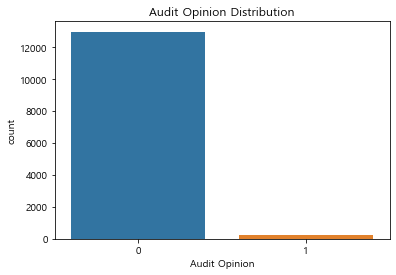

In [18]:
sns.countplot(df['감사의견'])
plt.xlabel('Audit Opinion')
plt.title('Audit Opinion Distribution')

3.2. 히스토그램

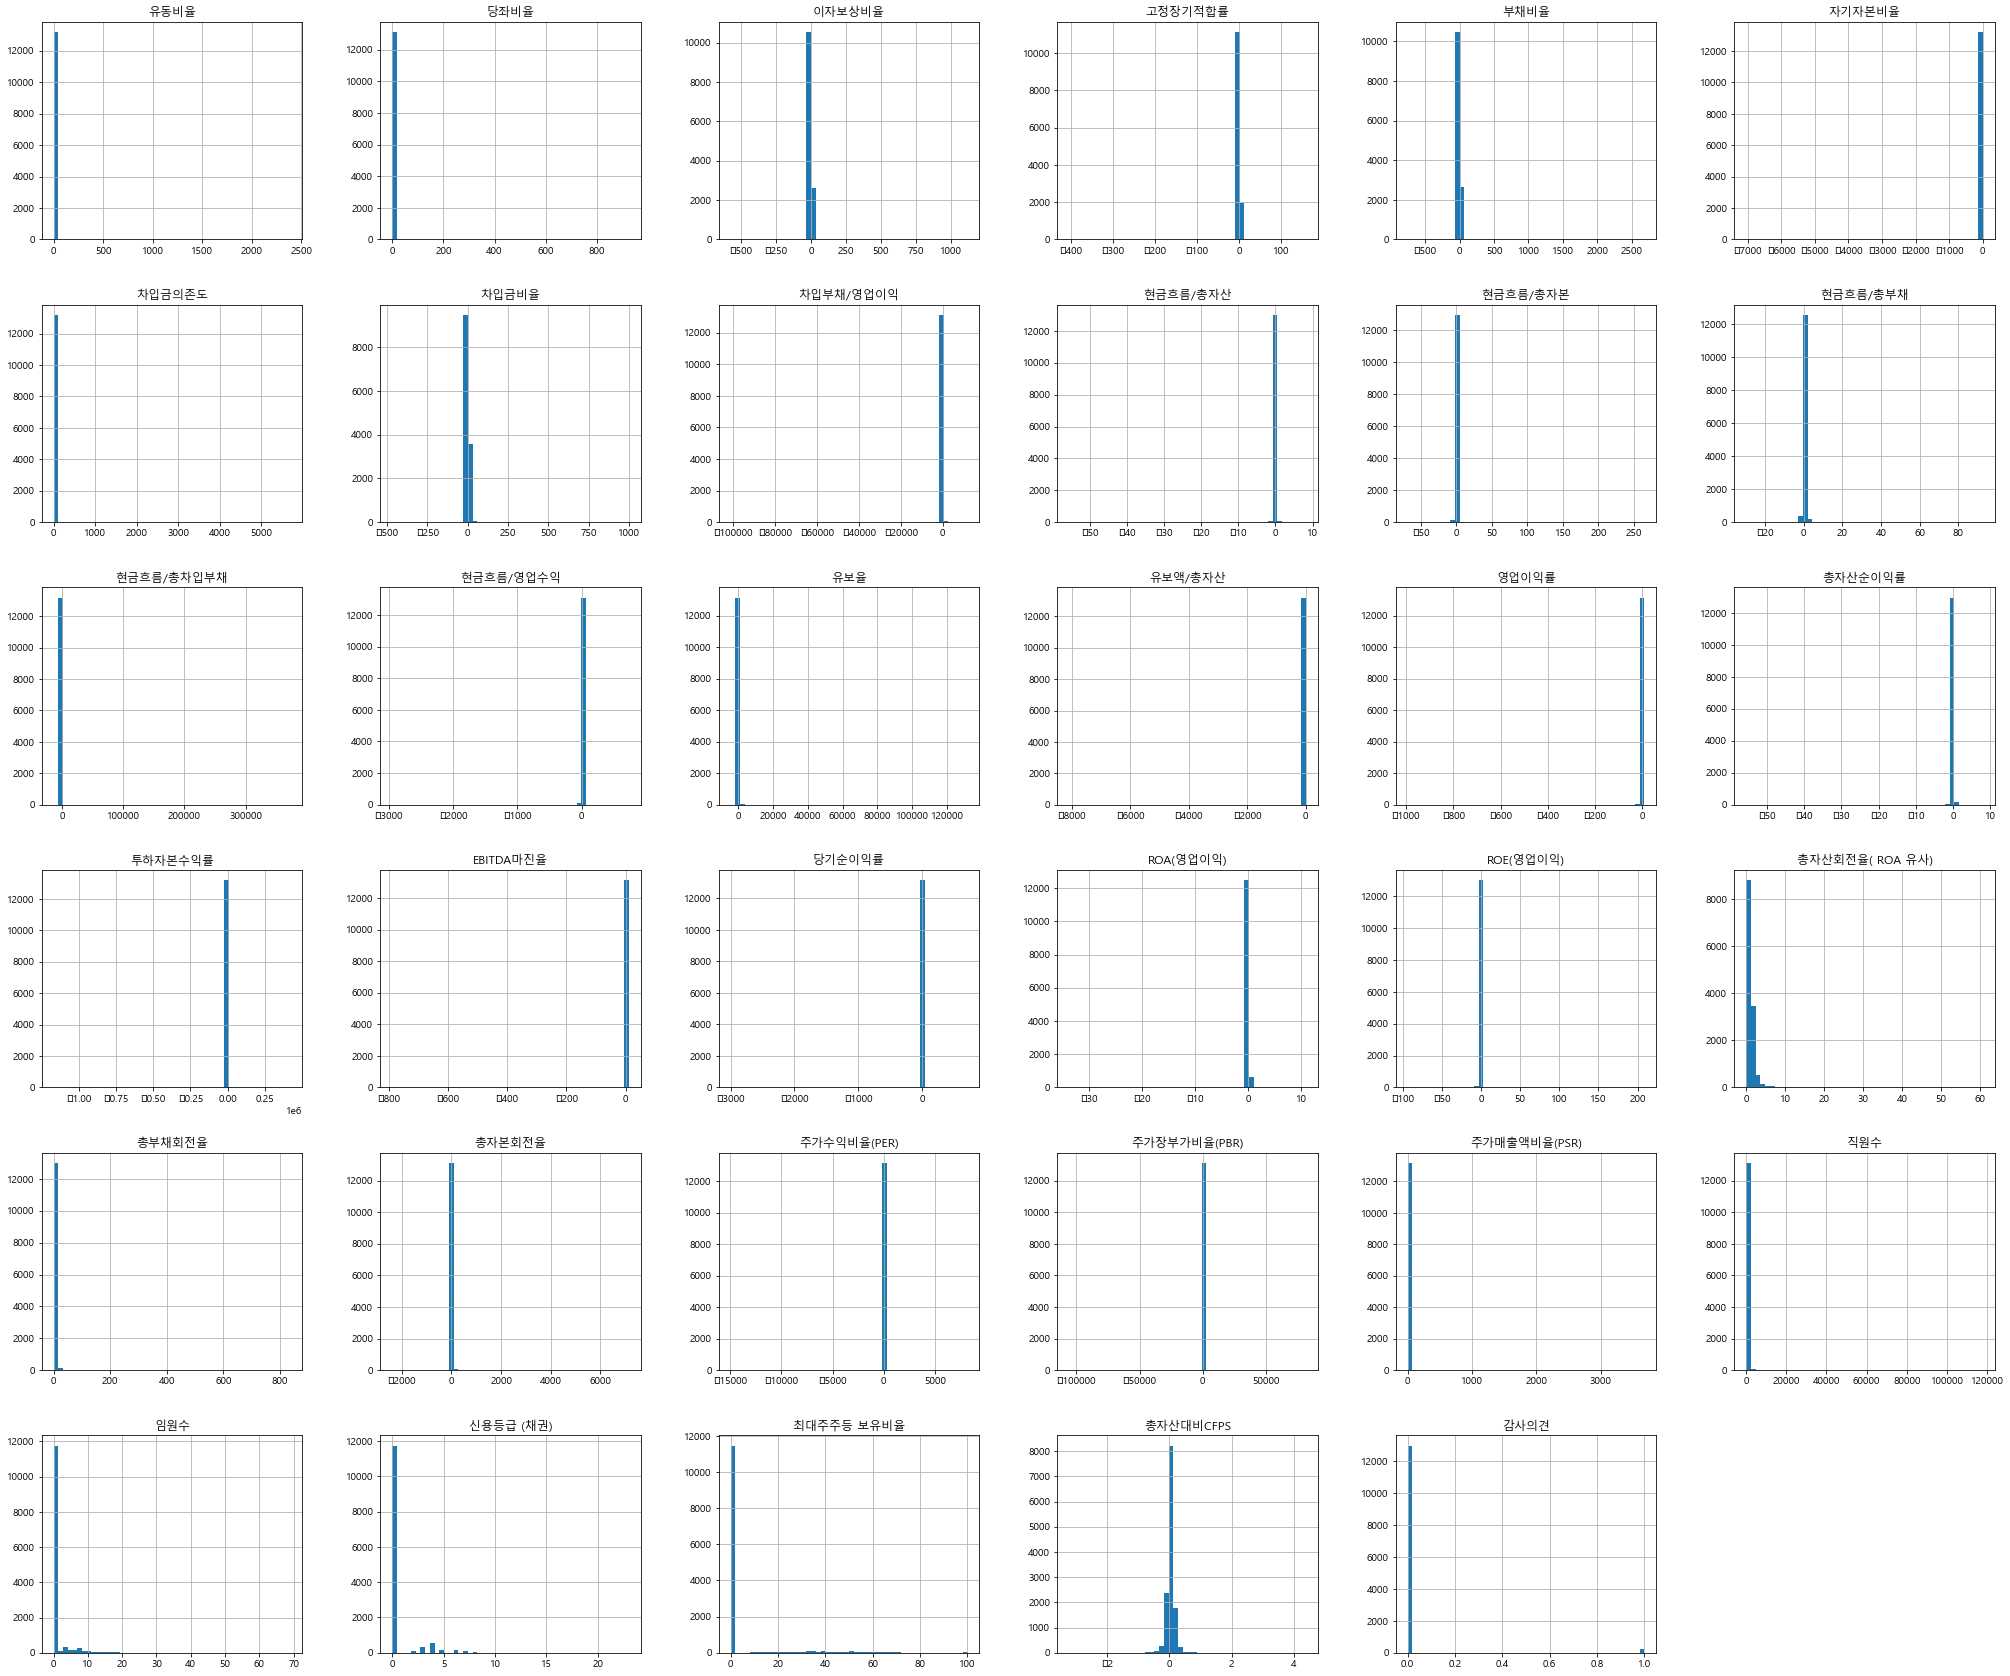

In [19]:
df.hist(figsize = (35,30), bins = 50)
plt.show()

3.3. 상관관계분석

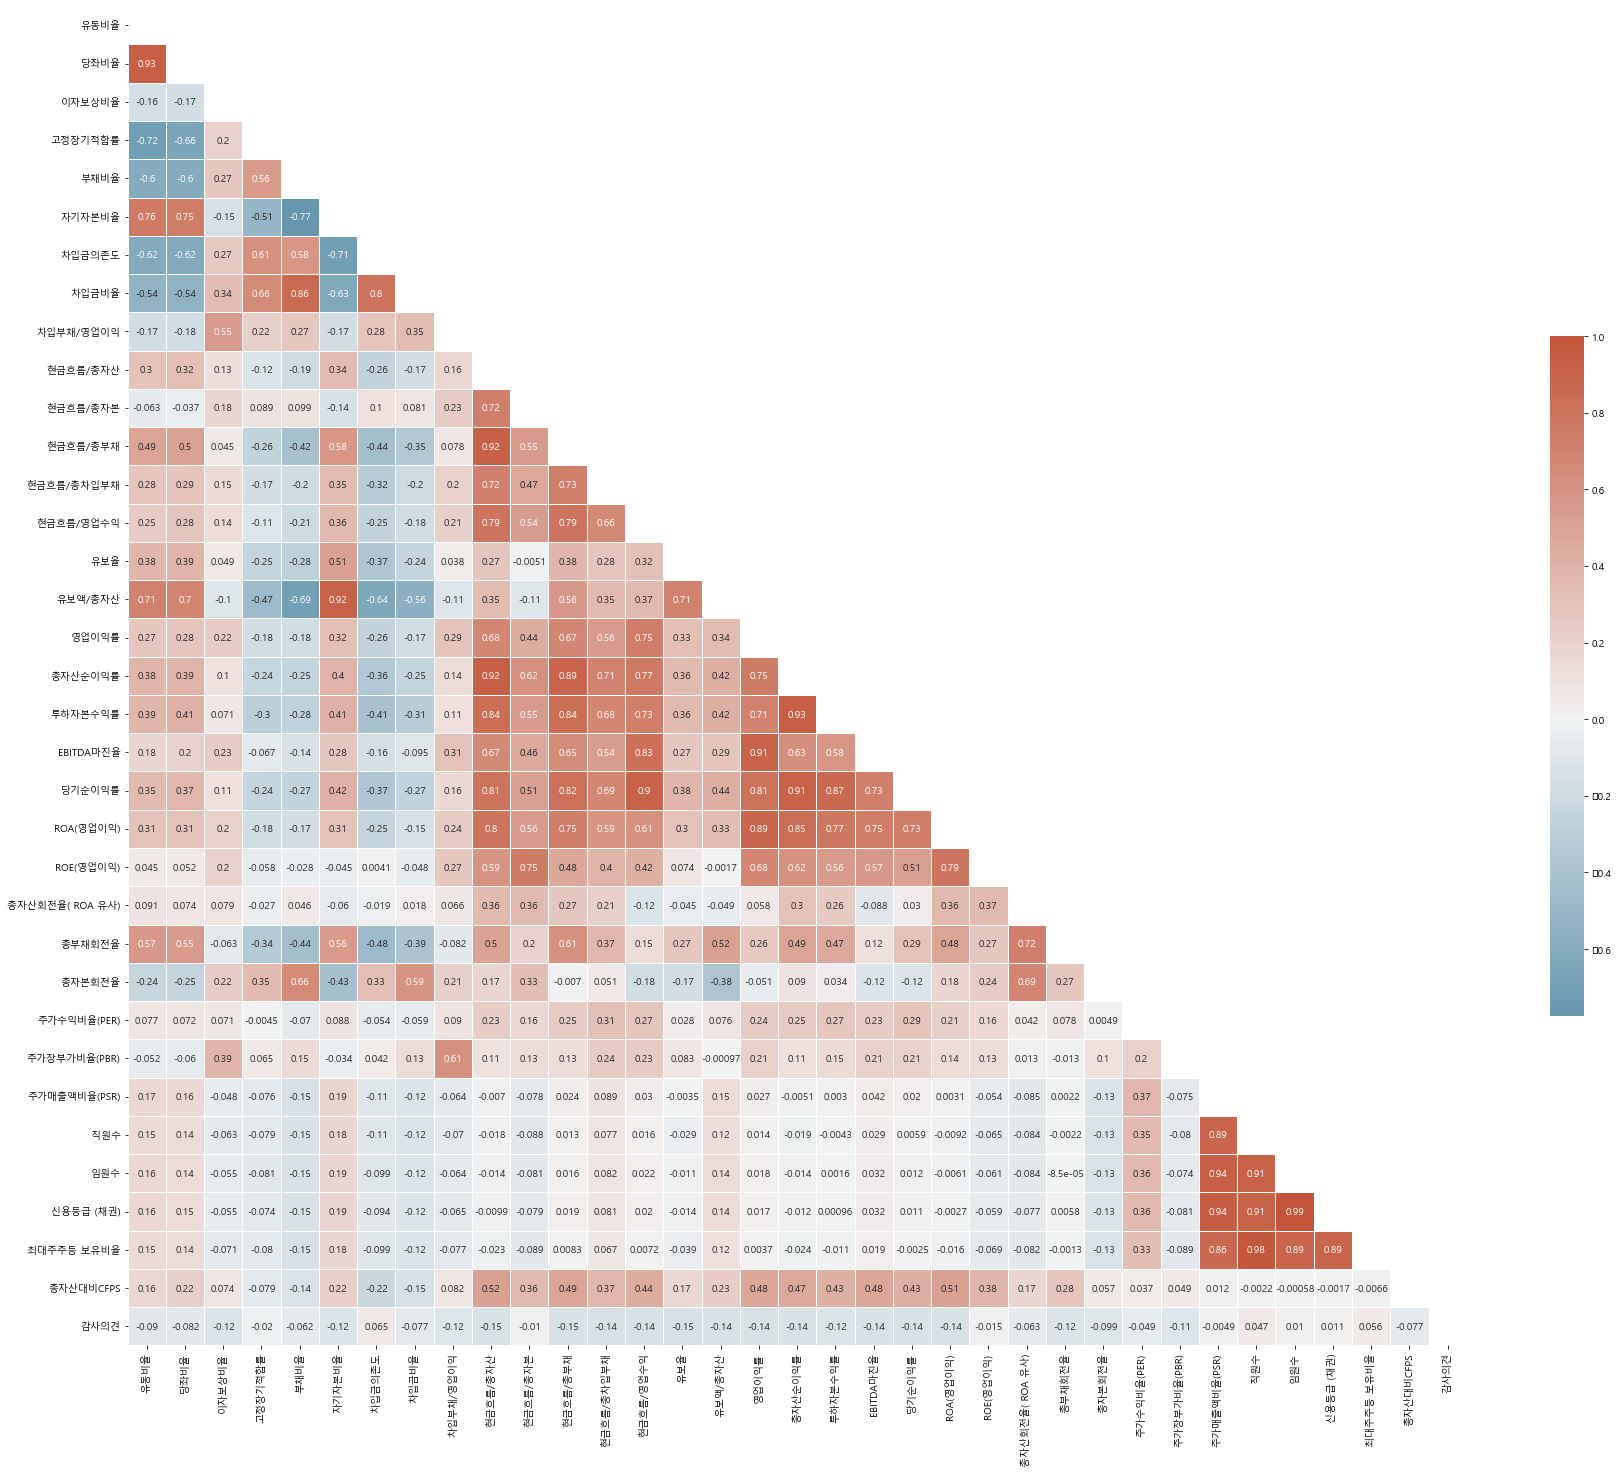

In [20]:
f, ax = plt.subplots(figsize=(30, 25))

mat = df.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

* 순위확인

In [173]:
mat['감사의견'].abs().sort_values(ascending = False)[1:11]

유보율          0.150207
현금흐름/총자산     0.145751
현금흐름/총부채     0.145400
영업이익률        0.144165
현금흐름/영업수익    0.143594
ROA(영업이익)    0.142483
EBITDA마진율    0.142352
총자산순이익률      0.142028
유보액/총자산      0.141579
당기순이익률       0.139553
Name: 감사의견, dtype: float64

In [174]:
mat['감사의견'].sort_values(ascending = False)[1:6]

# 오히려 토지를 차감 안하는게 낫다는 것인가?

차입금의존도        0.064536
최대주주등 보유비율    0.055918
직원수           0.046599
신용등급 (채권)     0.010590
임원수           0.009951
Name: 감사의견, dtype: float64

In [175]:
mat['감사의견'].sort_values(ascending = True)[:5]

유보율         -0.150207
현금흐름/총자산    -0.145751
현금흐름/총부채    -0.145400
영업이익률       -0.144165
현금흐름/영업수익   -0.143594
Name: 감사의견, dtype: float64

3.4. 피쳐별 분포확인

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


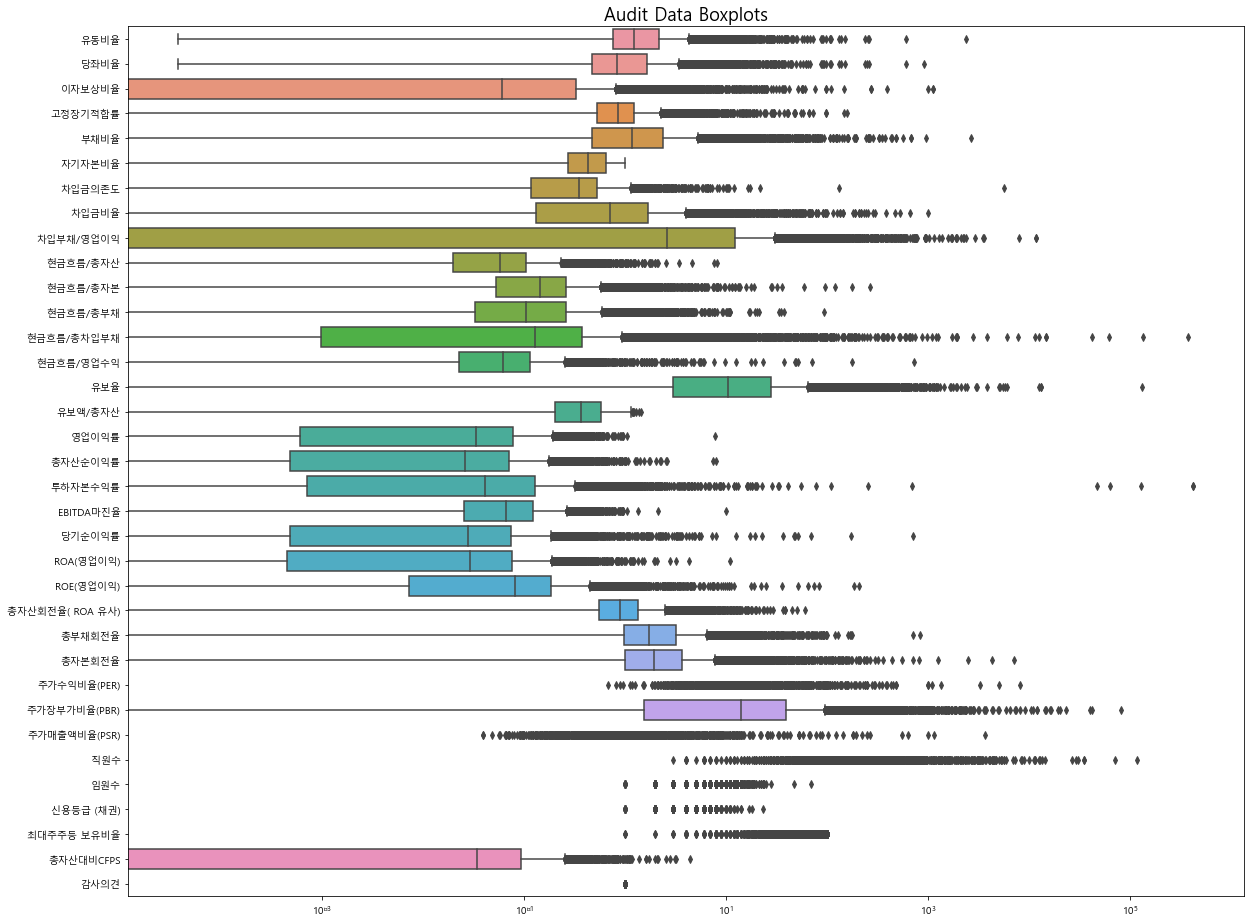

In [24]:
plt.figure(figsize = (20,16))
ax =sns.boxplot(data = df, orient="h")
ax.set_title('Audit Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

# 중심이 없는 값은 무엇인가 => 0에 몰려있는 잘못된 데이터
# 사용이 불가능 할 것으로 보임...

3.5. 감사의견별 분포확인

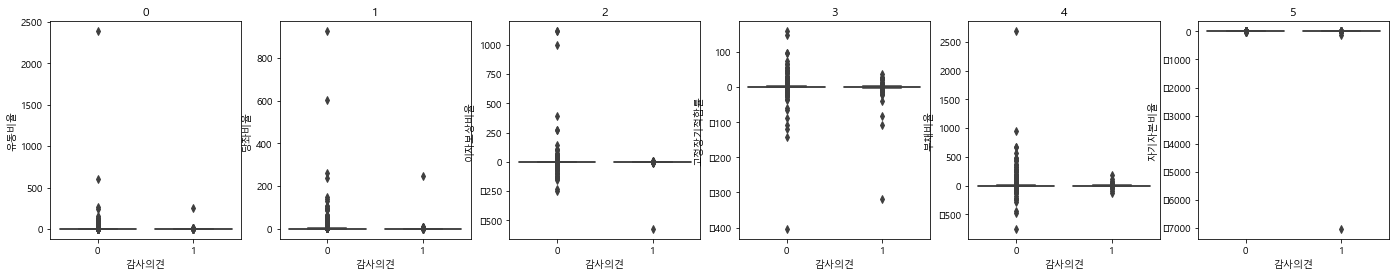

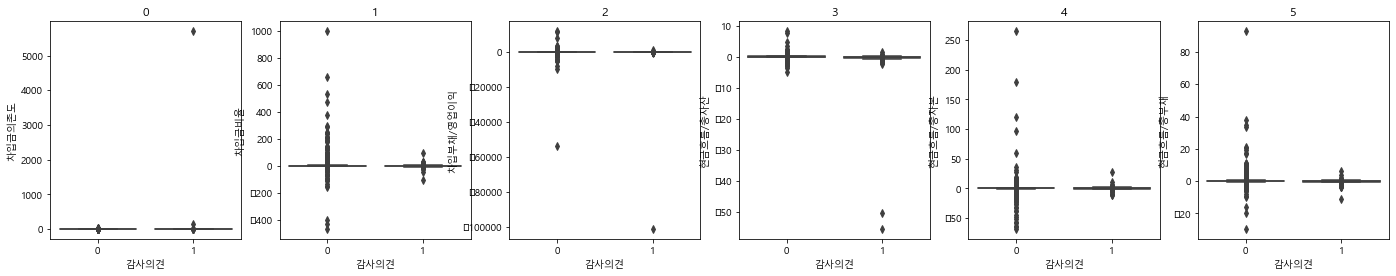

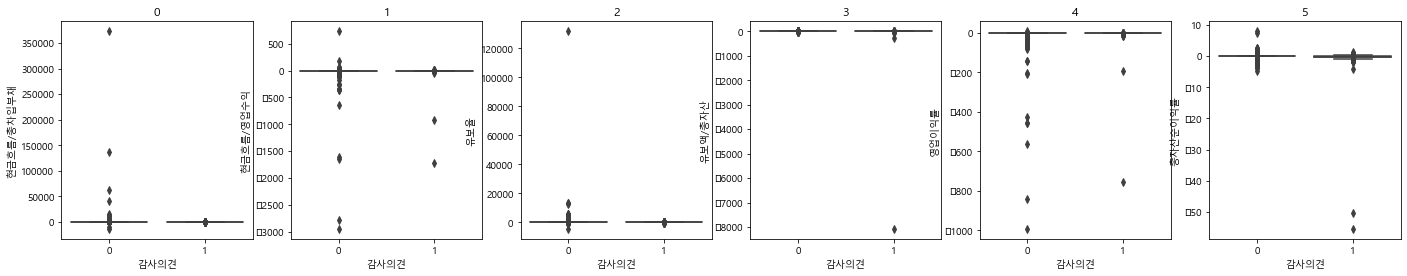

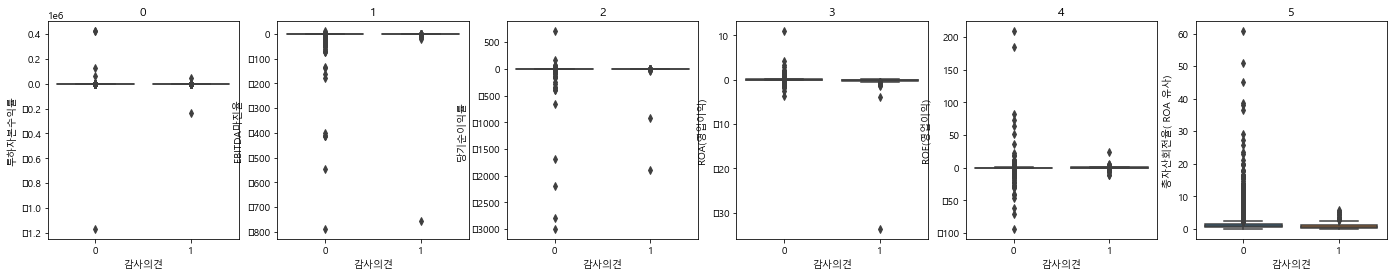

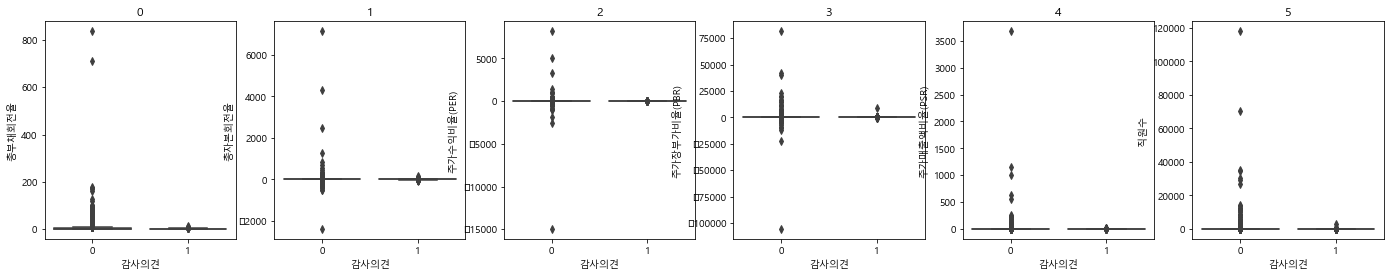

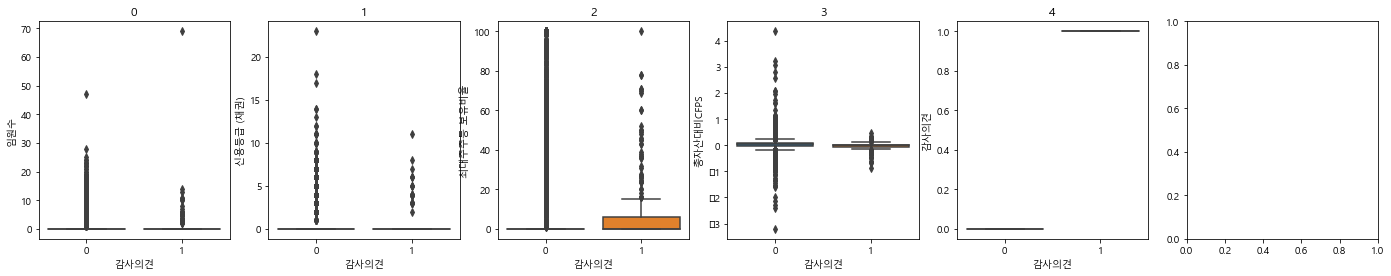

In [25]:
for j in range(6):
    cols = df.columns[j*6:(j+1)*6]

    n=0
    f, axes = plt.subplots(ncols=6, figsize=(24,4))

    for i in cols:
        sns.boxplot(x= '감사의견', y= i , data=df, ax=axes[n])
        axes[n].set_title(n)
        n=n+1
    plt.show()
    
# 유의적 차이를 보이는 피쳐가 없다.

* 아래는 히스토그램이랑 같은데 왜 그리는 것인지?

    정규분포 때문인가?

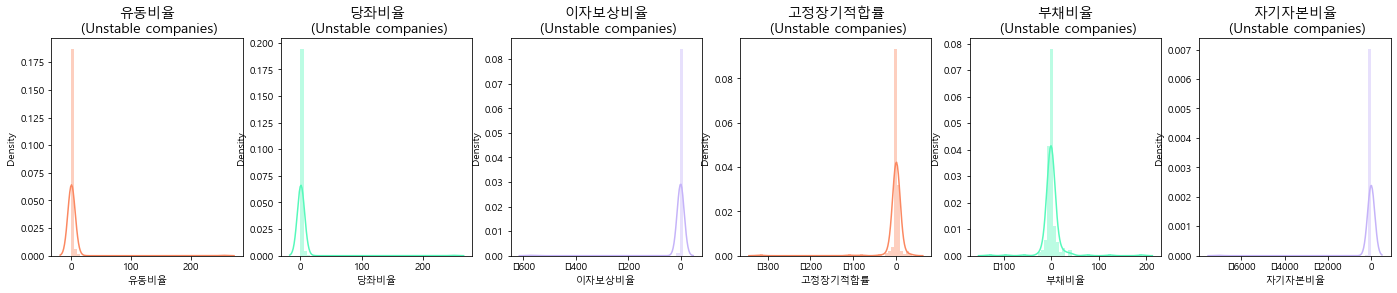

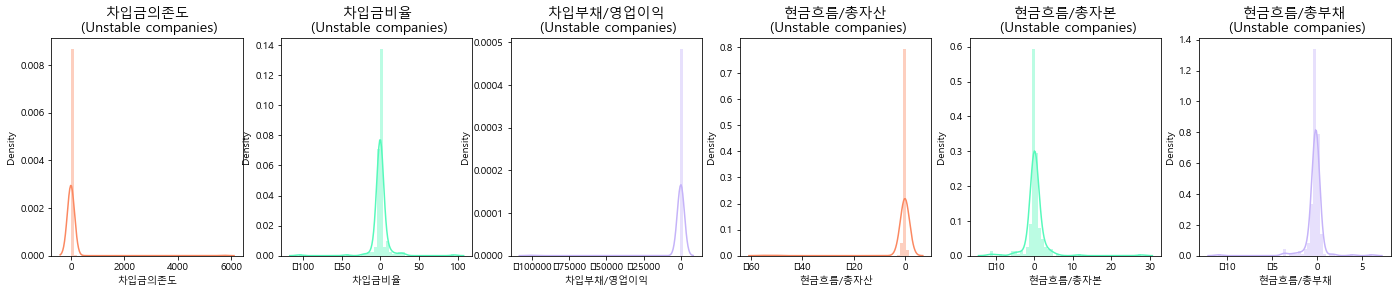

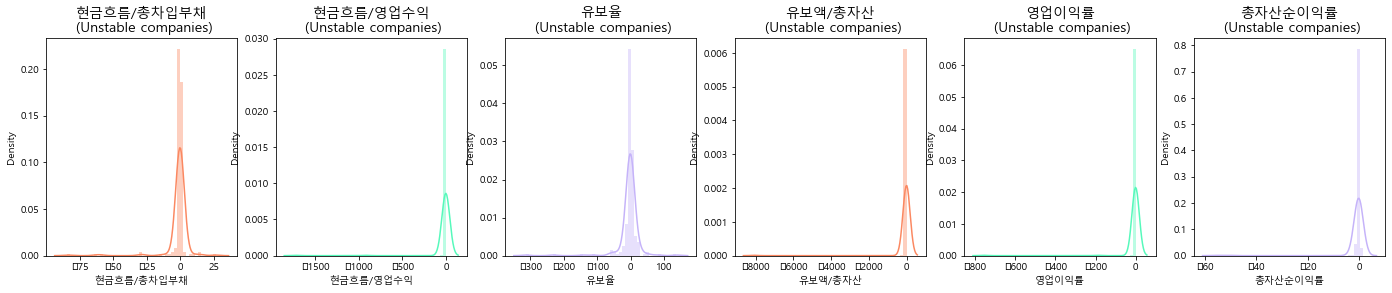

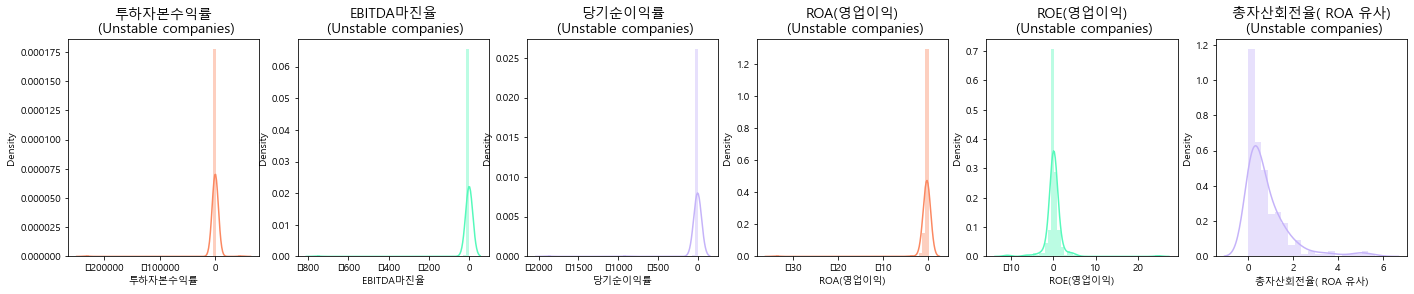

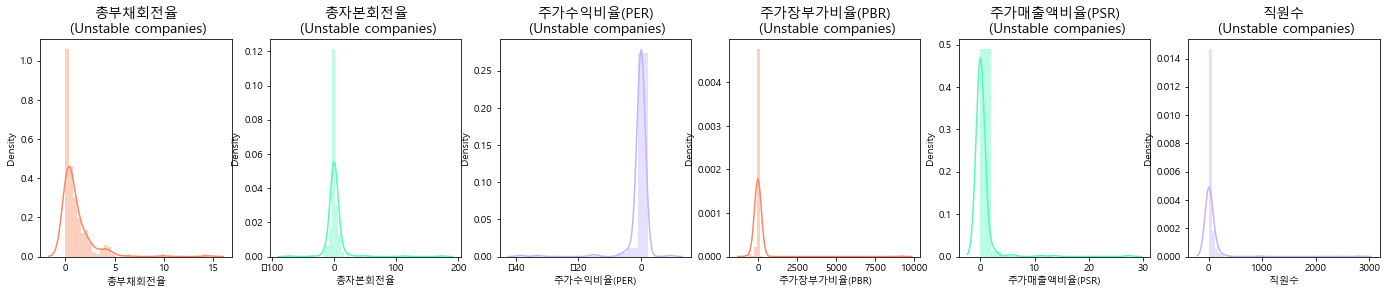

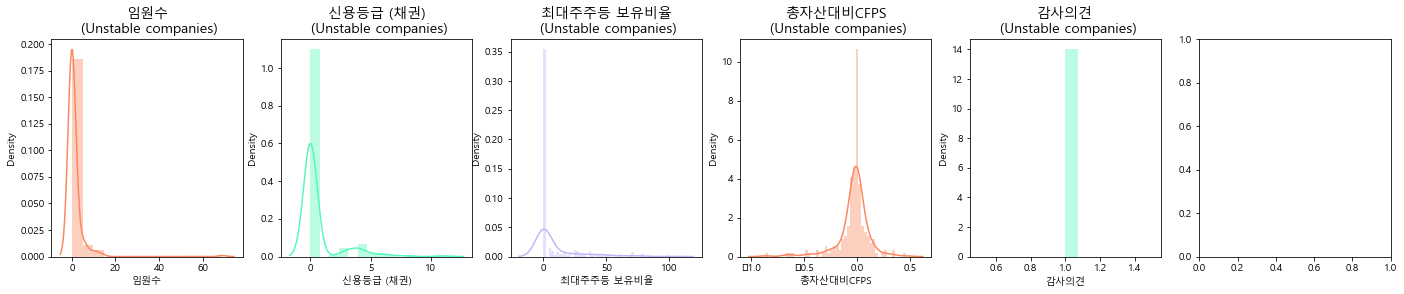

In [26]:
for j in range(6):

    f, axes = plt.subplots(1,6, figsize=(24, 4))

    cols = df.columns[j*6:(j+1)*6]
    colors = ['#FB8861','#56F9BB','#C5B3F9','#FB8861','#56F9BB','#C5B3F9']
    
    n = 0
    
    for i, l in zip(cols, colors):
        sns.distplot(df[i].loc[df['감사의견']== 1] ,ax= axes[n], color= l) # fit=norm 왜 안되냐?
        axes[n].set_title(i + '\n (Unstable companies)', fontsize=14)
        n+=1
    plt.show()
    
    
# 이상치들이 극단적으로 많은 것을 볼 수 있음.

In [27]:
for j,i in enumerate(range(df.shape[1])):
    
    print('{0}. {1}:' .format(j,df.columns[i]))
    print("    1. Skewness: %f" % df.iloc[:,i].skew())
    print("    2. Kurtosis: %f\n" % df.iloc[:,i].kurt())
    
# df[i] 를 하면  self._engine.get_loc(casted_key) 오류 발생
    # => i는 iloc으로 찾아야지 ㅄ아

0. 유동비율:
    1. Skewness: 95.801550
    2. Kurtosis: 10117.583761

1. 당좌비율:
    1. Skewness: 58.162198
    2. Kurtosis: 4242.019570

2. 이자보상비율:
    1. Skewness: 42.663316
    2. Kurtosis: 2669.780936

3. 고정장기적합률:
    1. Skewness: -32.958282
    2. Kurtosis: 2221.266418

4. 부채비율:
    1. Skewness: 48.477151
    2. Kurtosis: 3878.770948

5. 자기자본비율:
    1. Skewness: -114.762181
    2. Kurtosis: 13176.417652

6. 차입금의존도:
    1. Skewness: 114.734508
    2. Kurtosis: 13172.122469

7. 차입금비율:
    1. Skewness: 22.410368
    2. Kurtosis: 1284.186234

8. 차입부채/영업이익:
    1. Skewness: -83.269217
    2. Kurtosis: 7716.525446

9. 현금흐름/총자산:
    1. Skewness: -69.462036
    2. Kurtosis: 5399.374936

10. 현금흐름/총자본:
    1. Skewness: 38.023468
    2. Kurtosis: 2577.975411

11. 현금흐름/총부채:
    1. Skewness: 33.923035
    2. Kurtosis: 2277.316106

12. 현금흐름/총차입부채:
    1. Skewness: 94.224972
    2. Kurtosis: 9609.880948

13. 현금흐름/영업수익:
    1. Skewness: -49.826883
    2. Kurtosis: 2832.746297

14. 유보율:
    1. Skewness

In [28]:
Skewness = []
Kurtosis = []
for i in range(df.shape[1]):    
    Skewness.append(df.iloc[:,i].skew())
    Kurtosis.append(df.iloc[:,i].kurt())

In [29]:
# 마지막 값만 남음. 아니 왜???
# 아.. 병신아. 변수를 안에 설정하니까 다시 초기화되지....

# 4. 이상치 제거

In [30]:
for col in df:
    print(col)

유동비율
당좌비율
이자보상비율
고정장기적합률
부채비율
자기자본비율
차입금의존도
차입금비율
차입부채/영업이익
현금흐름/총자산
현금흐름/총자본
현금흐름/총부채
현금흐름/총차입부채
현금흐름/영업수익
유보율
유보액/총자산
영업이익률
총자산순이익률
투하자본수익률
EBITDA마진율
당기순이익률
ROA(영업이익)
ROE(영업이익)
총자산회전율( ROA 유사)
총부채회전율
총자본회전율
주가수익비율(PER)
주가장부가비율(PBR)
주가매출액비율(PSR)
직원수
임원수
신용등급 (채권)
최대주주등 보유비율
총자산대비CFPS
감사의견


## 4.1. 하나의 컬럼에 대해서만 없애는 방법

In [99]:
def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    feat_iqr = q75 - q25    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' Amount of outliers: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print(len(dataset))
    
    print('-' * 65)
    
    return dataset

df_removed1 = outliers_removal(df['이자보상비율'],'이자보상비율',df)
    
# 이러면 맨 마지막 것만 떨어지므로 감사의견만 1이 제거됨. 병신임.

이자보상비율 Amount of outliers: 2670
10519
-----------------------------------------------------------------


In [100]:
df_removed1

,유동비율,당좌비율,이자보상비율,고정장기적합률,부채비율,자기자본비율,차입금의존도,차입금비율,차입부채/영업이익,현금흐름/총자산,...,총자본회전율,주가수익비율(PER),주가장부가비율(PBR),주가매출액비율(PSR),직원수,임원수,신용등급 (채권),최대주주등 보유비율,총자산대비CFPS,감사의견
0,2.475832,2.006179,0.011219,0.615821,0.399217,0.714685,0.043111,0.060322,0.356203,0.172263,...,0.917038,8.855768,10.690264,1.263967,117904,12,8,21,0.170353,0
1,1.006524,0.595315,0.457001,0.995675,1.718271,0.367881,0.293265,0.797174,9.068920,0.094441,...,2.041998,133.625418,25.556463,6.960265,10105,7,5,100,0.066313,0
2,2.549615,1.634890,0.047863,0.749971,0.596844,0.626235,0.162201,0.259010,2.405964,0.069683,...,0.314160,149.548966,20.249553,37.538672,4329,3,4,75,0.063785,0
3,1.819338,1.215615,0.038719,0.851733,0.549845,0.645226,0.198675,0.307915,1.543034,0.210204,...,0.691382,5.965627,10.023356,1.334175,30595,12,5,20,0.217369,0
4,1.355311,0.805356,0.077968,0.671468,1.203159,0.453894,0.091063,0.200627,4.361788,0.047364,...,0.583939,38.110812,40.895104,3.516051,14319,12,4,30,0.047198,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25034,2.275710,0.614335,0.002152,0.042448,0.750603,0.571232,0.000000,0.000000,0.000000,0.077834,...,2.043318,0.000000,13.183757,0.000000,0,0,0,0,0.136441,0
25035,11.457245,10.210646,0.017368,0.288276,0.289566,0.775455,0.180877,0.233253,2.136141,0.101992,...,0.915750,0.000000,12.816891,0.000000,0,0,0,0,0.060220,0
25036,3.073441,0.233533,-0.109220,0.091686,1.704507,0.369753,0.528230,1.428602,-4.114603,0.052571,...,2.055060,0.000000,21.438348,0.000000,0,0,0,0,-0.697155,0
25038,4.993664,4.250386,0.013567,0.269917,0.637676,0.610622,0.202958,0.332380,0.698932,0.271504,...,2.355246,0.000000,3.964590,0.000000,0,0,0,0,0.032627,0


In [101]:
df_removed1['감사의견'].value_counts()

0    10360
1      159
Name: 감사의견, dtype: int64

In [102]:
(12980-10304)/12980

0.2061633281972265

In [103]:
(751- 576) /751
# 유사하게 떨어짐.

0.23302263648468707

* 분포재확인

In [104]:
for j,i in enumerate(range(df_removed1.shape[1])):
    
    print('{0}. {1}:' .format(j,df_removed1.columns[i]))
    print("    1. Skewness: %f" % df_removed1.iloc[:,i].skew())
    print("    2. Kurtosis: %f\n" % df_removed1.iloc[:,i].kurt())

0. 유동비율:
    1. Skewness: 40.849194
    2. Kurtosis: 2413.547444

1. 당좌비율:
    1. Skewness: 42.097813
    2. Kurtosis: 2515.023474

2. 이자보상비율:
    1. Skewness: 0.505378
    2. Kurtosis: 0.534468

3. 고정장기적합률:
    1. Skewness: -35.433786
    2. Kurtosis: 2287.826290

4. 부채비율:
    1. Skewness: 63.677433
    2. Kurtosis: 5134.380390

5. 자기자본비율:
    1. Skewness: -102.490840
    2. Kurtosis: 10509.124814

6. 차입금의존도:
    1. Skewness: 102.467326
    2. Kurtosis: 10505.863179

7. 차입금비율:
    1. Skewness: 47.572441
    2. Kurtosis: 2981.431297

8. 차입부채/영업이익:
    1. Skewness: -100.701672
    2. Kurtosis: 10259.880618

9. 현금흐름/총자산:
    1. Skewness: -63.134462
    2. Kurtosis: 4409.578720

10. 현금흐름/총자본:
    1. Skewness: 40.771363
    2. Kurtosis: 2697.720673

11. 현금흐름/총부채:
    1. Skewness: 31.382714
    2. Kurtosis: 1903.627539

12. 현금흐름/총차입부채:
    1. Skewness: 84.148186
    2. Kurtosis: 7664.313375

13. 현금흐름/영업수익:
    1. Skewness: -56.336982
    2. Kurtosis: 3429.979836

14. 유보율:
    1. Skewness: 9

## 4.2 모든 컬럼에 대해 없애는 방법

In [105]:
def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    feat_iqr = q75 - q25    
    feat_cut_off = feat_iqr * 1.6
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' Amount of outliers: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print(len(dataset))
    
    print('-' * 65)

for col in df:
    df_removed2 = outliers_removal(df[col],str(col),df)

유동비율 Amount of outliers: 1223
11966
-----------------------------------------------------------------
당좌비율 Amount of outliers: 1215
11974
-----------------------------------------------------------------
이자보상비율 Amount of outliers: 2546
10643
-----------------------------------------------------------------
고정장기적합률 Amount of outliers: 904
12285
-----------------------------------------------------------------
부채비율 Amount of outliers: 1319
11870
-----------------------------------------------------------------
자기자본비율 Amount of outliers: 235
12954
-----------------------------------------------------------------
차입금의존도 Amount of outliers: 237
12952
-----------------------------------------------------------------
차입금비율 Amount of outliers: 1107
12082
-----------------------------------------------------------------
차입부채/영업이익 Amount of outliers: 1910
11279
-----------------------------------------------------------------
현금흐름/총자산 Amount of outliers: 1312
11877
------------------------------

In [123]:
def outliers_removal(dataset):
    
    drop_index = set([])
    
    for col in dataset.columns[:-1]:
        
        feature = dataset[col]
        feature_name = col
        
        
        q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
        feat_iqr = q75 - q25    
        feat_cut_off = feat_iqr * 2
        feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off

        outliers = [x for x in feature if x < feat_lower or x > feat_upper]
        print(feature_name + ' Amount of outliers: {}'.format(len(outliers)))
        #print(feature_name + ' outliers:{}'.format(outliers))

        
        removal_index = dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index
        
        drop_index.update(list(removal_index))
        
        # k.update([3, 4, 5]) : 집합에 여러 값 추가시 사용
        
        print('제거 레코드 수: %d' %len(drop_index))

        print('-' * 65)
    
    dataset = dataset.drop(list(drop_index))    
    
    return dataset
       
        
df_removed2 = outliers_removal(df)


유동비율 Amount of outliers: 1026
제거 레코드 수: 1026
-----------------------------------------------------------------
당좌비율 Amount of outliers: 1013
제거 레코드 수: 1120
-----------------------------------------------------------------
이자보상비율 Amount of outliers: 2181
제거 레코드 수: 3249
-----------------------------------------------------------------
고정장기적합률 Amount of outliers: 740
제거 레코드 수: 3750
-----------------------------------------------------------------
부채비율 Amount of outliers: 1114
제거 레코드 수: 4160
-----------------------------------------------------------------
자기자본비율 Amount of outliers: 179
제거 레코드 수: 4264
-----------------------------------------------------------------
차입금의존도 Amount of outliers: 197
제거 레코드 수: 4311
-----------------------------------------------------------------
차입금비율 Amount of outliers: 943
제거 레코드 수: 4335
-----------------------------------------------------------------
차입부채/영업이익 Amount of outliers: 1613
제거 레코드 수: 5008
--------------------------------------------------------

In [121]:
df_removed2

,유동비율,당좌비율,이자보상비율,고정장기적합률,부채비율,자기자본비율,차입금의존도,차입금비율,차입부채/영업이익,현금흐름/총자산,...,총자본회전율,주가수익비율(PER),주가장부가비율(PBR),주가매출액비율(PSR),직원수,임원수,신용등급 (채권),최대주주등 보유비율,총자산대비CFPS,감사의견
2253,0.583674,0.440246,0.413853,1.402449,2.053808,0.327460,0.376933,1.151079,16.380150,0.075496,...,4.356748,0.0,67.483478,0.0,0,0,0,0,0.067448,0
2279,1.623461,0.669938,0.110464,0.391520,1.378046,0.420513,0.364226,0.866147,6.319414,0.069186,...,4.158269,0.0,17.436290,0.0,0,0,0,0,-0.145543,0
2289,2.636731,2.271296,0.266965,0.550346,0.288454,0.776124,0.040901,0.052699,-1.342967,0.016634,...,1.744486,0.0,-30.699212,0.0,0,0,0,0,-0.040999,0
2291,1.272318,0.615056,0.032880,0.845622,0.629684,0.613616,0.282837,0.460936,1.641165,0.213312,...,1.805436,0.0,4.998866,0.0,0,0,0,0,0.150947,0
2297,1.090117,0.888535,0.215166,0.934164,0.912208,0.522956,0.354991,0.678817,10.772508,0.067563,...,1.334157,0.0,42.558326,0.0,0,0,0,0,0.139268,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25011,0.621928,0.594072,0.124600,1.388054,2.370849,0.296661,0.493093,1.662142,5.936104,0.095227,...,2.821958,0.0,14.389166,0.0,0,0,0,0,0.041473,0
25031,0.448859,0.448859,0.159430,1.480289,1.704768,0.369717,0.557187,1.507062,14.609708,0.080894,...,1.210534,0.0,29.777354,0.0,0,0,0,0,0.051035,0
25033,2.377386,2.072978,0.396822,0.477175,3.885132,0.204703,0.507108,2.477291,17.812066,0.080110,...,3.877773,0.0,38.780935,0.0,0,0,0,0,0.148528,0
25034,2.275710,0.614335,0.002152,0.042448,0.750603,0.571232,0.000000,0.000000,0.000000,0.077834,...,2.043318,0.0,13.183757,0.0,0,0,0,0,0.136441,0


In [116]:
for j,i in enumerate(range(df_removed2.shape[1])):
    
    print('{0}. {1}:' .format(j,df_removed2.columns[i]))
    print("    1. Skewness: %f" % df_removed2.iloc[:,i].skew())
    print("    2. Kurtosis: %f\n" % df_removed2.iloc[:,i].kurt())

0. 유동비율:
    1. Skewness: 1.359951
    2. Kurtosis: 1.979774

1. 당좌비율:
    1. Skewness: 1.459622
    2. Kurtosis: 2.221209

2. 이자보상비율:
    1. Skewness: 0.371181
    2. Kurtosis: 1.060471

3. 고정장기적합률:
    1. Skewness: 0.692677
    2. Kurtosis: 0.884845

4. 부채비율:
    1. Skewness: 0.946907
    2. Kurtosis: 0.715714

5. 자기자본비율:
    1. Skewness: 0.501579
    2. Kurtosis: -0.451256

6. 차입금의존도:
    1. Skewness: -0.258836
    2. Kurtosis: -0.614195

7. 차입금비율:
    1. Skewness: 0.953887
    2. Kurtosis: 0.751035

8. 차입부채/영업이익:
    1. Skewness: 0.296409
    2. Kurtosis: 0.986853

9. 현금흐름/총자산:
    1. Skewness: 0.107102
    2. Kurtosis: 0.787066

10. 현금흐름/총자본:
    1. Skewness: 0.467740
    2. Kurtosis: 0.989127

11. 현금흐름/총부채:
    1. Skewness: 1.050101
    2. Kurtosis: 2.099771

12. 현금흐름/총차입부채:
    1. Skewness: 1.205914
    2. Kurtosis: 1.681748

13. 현금흐름/영업수익:
    1. Skewness: 0.414150
    2. Kurtosis: 0.807910

14. 유보율:
    1. Skewness: 1.319445
    2. Kurtosis: 1.054077

15. 유보액/총자산:
    1. Skewn

In [124]:
df_removed2['감사의견'].value_counts()

0    3920
1       6
Name: 감사의견, dtype: int64

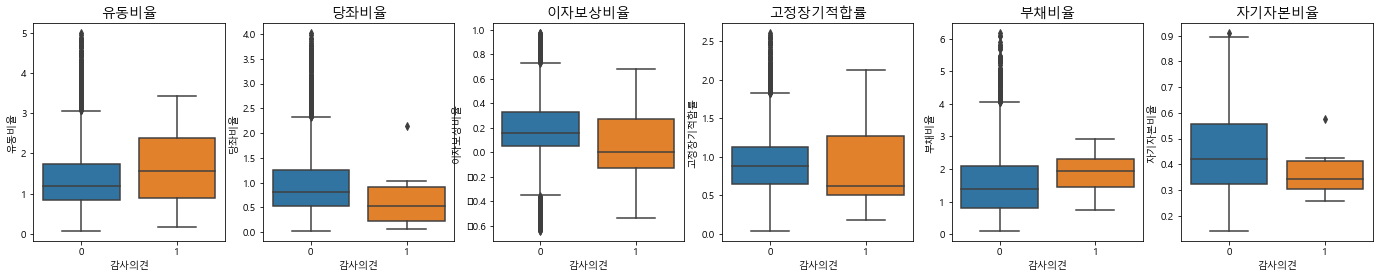

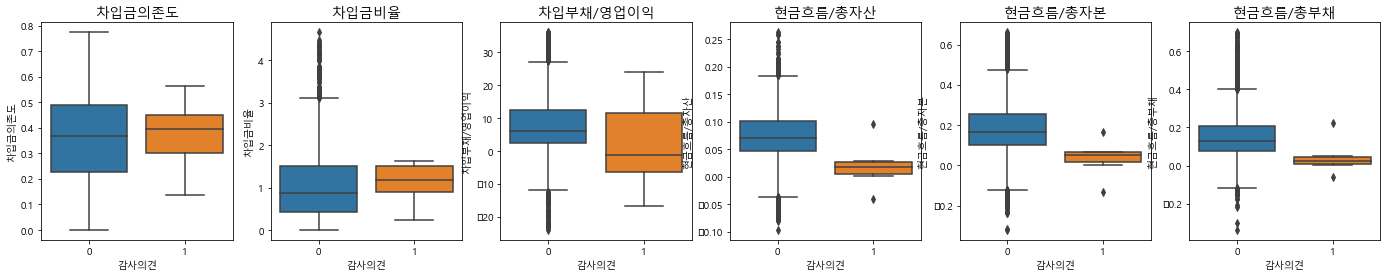

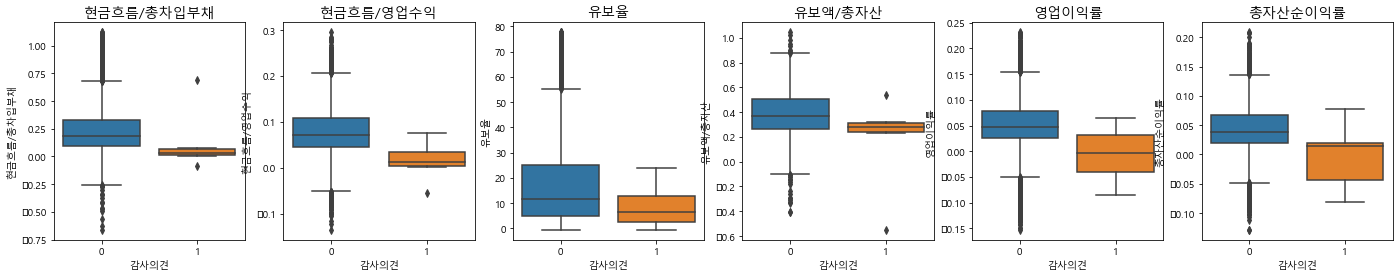

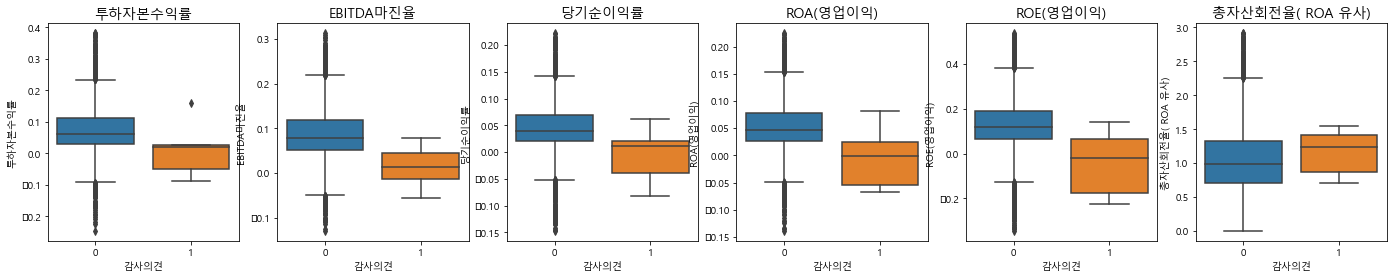

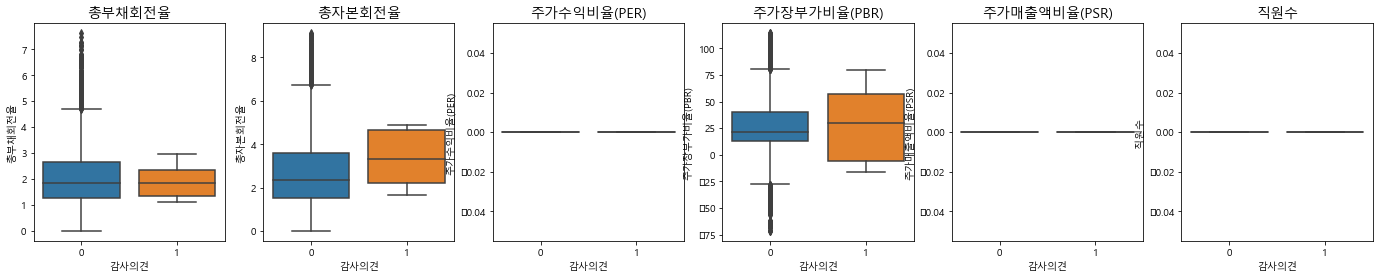

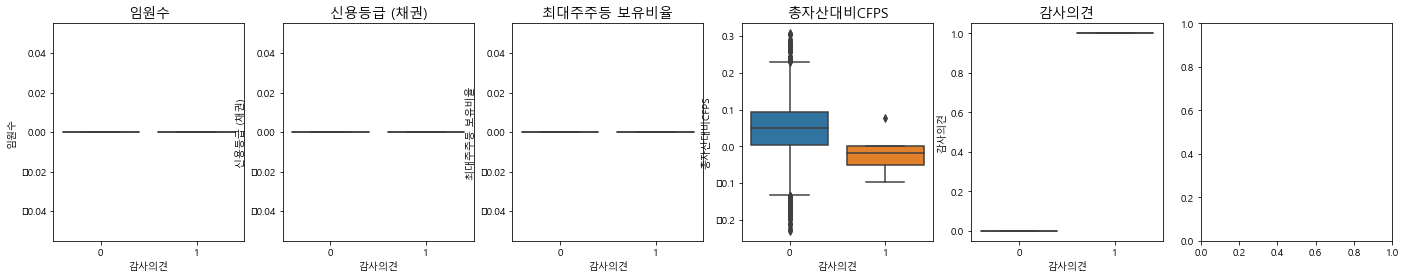

In [125]:
def draw_boxplot(dataset, horizental_number, vertical_number):
        
    for j in range(vertical_number):
        cols = dataset.columns[j*horizental_number:(j+1)*horizental_number]

        n=0
        f, axes = plt.subplots(ncols=horizental_number, figsize=(24,24/horizental_number))

        for i in cols:
            sns.boxplot(x= '감사의견', y= i , data=dataset, ax=axes[n])
            axes[n].set_title(i, fontsize = 14)
            n=n+1
        plt.show()
        
draw_boxplot(df_removed2, 6,6)

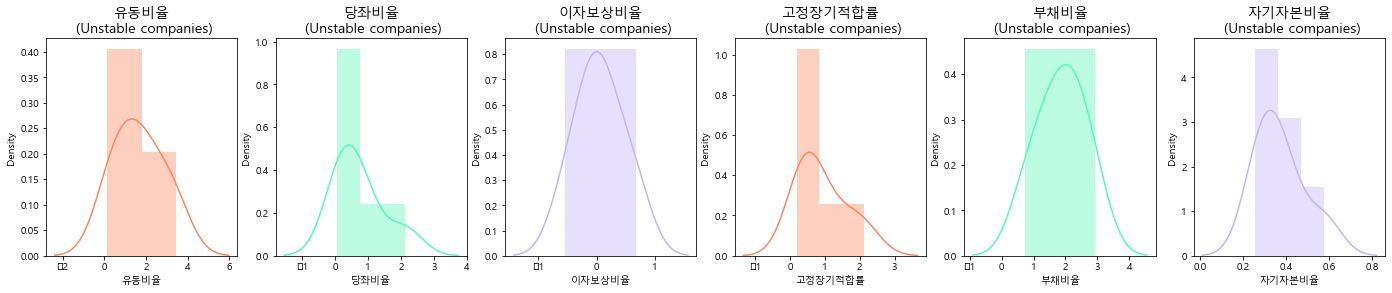

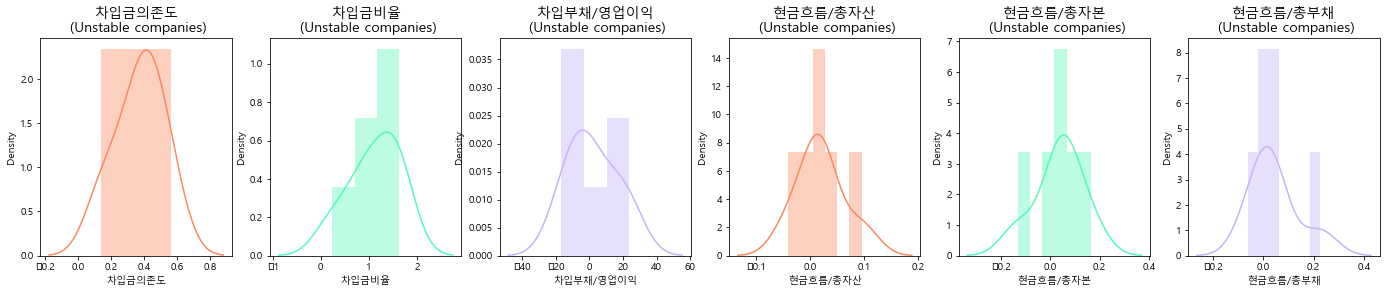

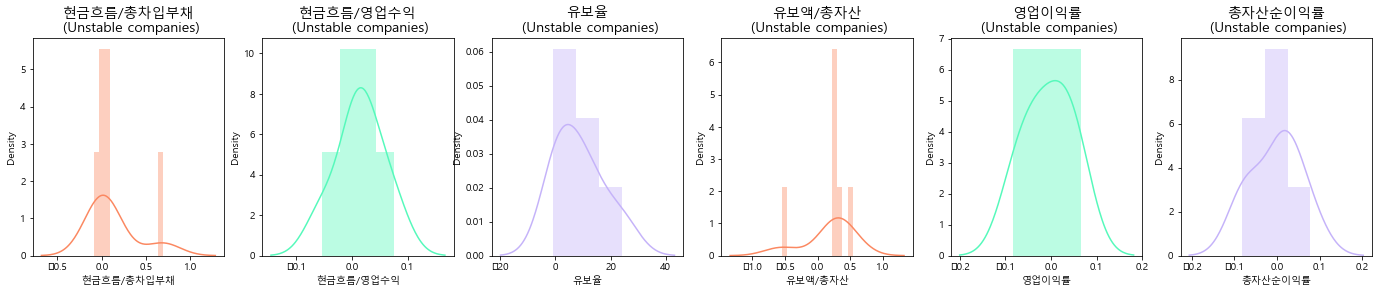

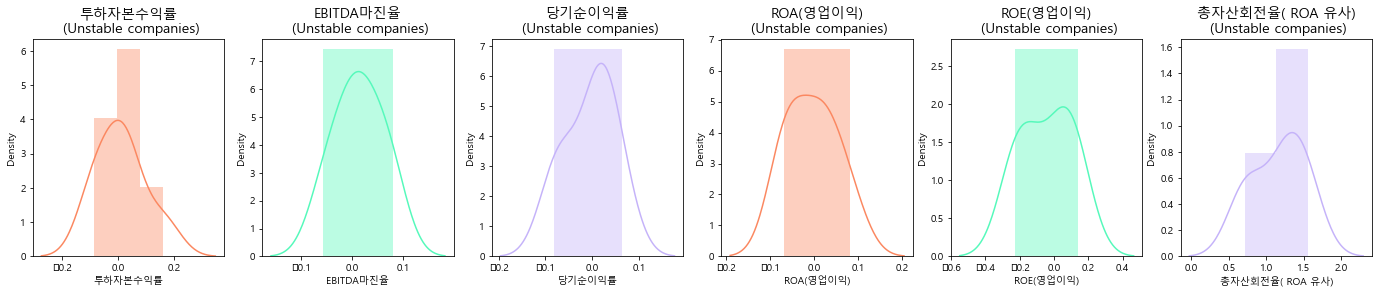

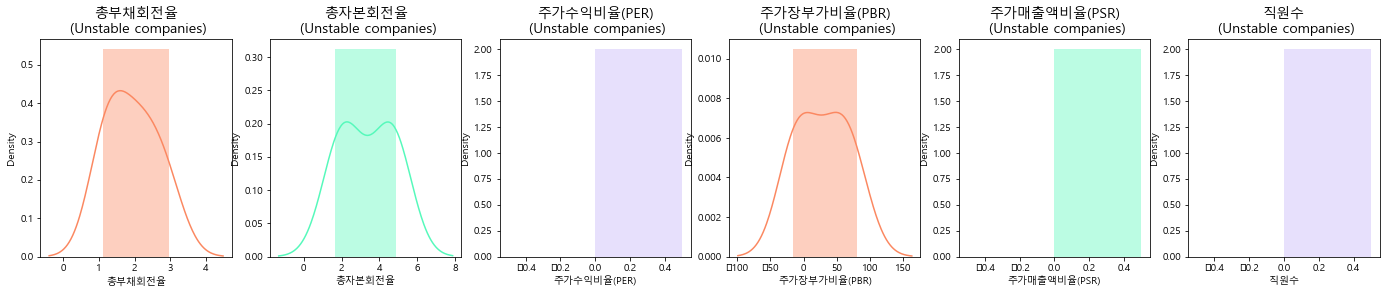

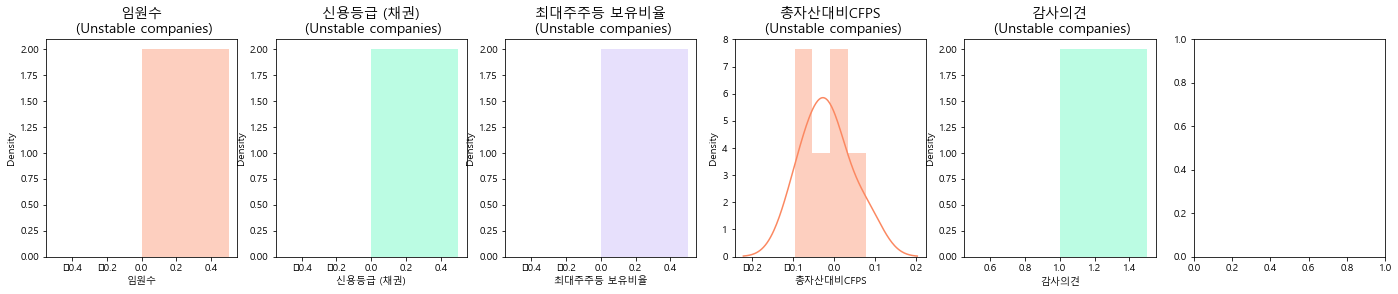

In [126]:
def draw_distplot(dataset, horizental_number, vertical_number):
    
    for j in range(vertical_number):

        f, axes = plt.subplots(1,horizental_number, figsize=(24, 24/horizental_number))

        cols = dataset.columns[j*horizental_number:(j+1)*horizental_number]
        colors = ['#FB8861','#56F9BB','#C5B3F9']*2

        n = 0

        for i, l in zip(cols, colors):
            sns.distplot(dataset[i].loc[df['감사의견']== 1] ,ax= axes[n], color= l) # fit=norm 왜 안되냐?
            axes[n].set_title(i + '\n (Unstable companies)', fontsize=14)
            n+=1
        plt.show()
        
draw_distplot(df_removed2,6,6)

4.3. 상하위 1%에 대해서만 없애는방법

* 이 방법 어디 정리해 놓은 것 같은데 찾아봐야.

# 5. 모형학습

# 5. 타겟 데이터 Oversampling 

이거 안했더니 전부 yes 로 찍고 점수 받더라... 지금 큰일난거

# 6. 모형학습

## 6.1. 하나만 없앤 데이터 학습

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from keras import models
from keras import layers

* SMOTE 를 이용하여 오버샘플링

In [200]:
from imblearn.over_sampling import SMOTE

In [201]:
X=df_removed1.drop(labels=['감사의견'], axis=1)
y=df_removed1['감사의견']

In [202]:
oversample = SMOTE()
X,y=oversample.fit_resample(X,y)

In [203]:
X.shape, y.shape
# df_removed1.shape : (11928, 34)
# X.shape[0]/df_removed1.shape[0] : 1.903755868544601

((20720, 34), (20720,))

<AxesSubplot:xlabel='감사의견', ylabel='count'>

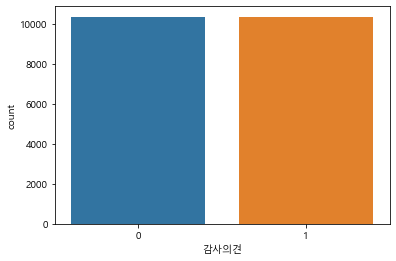

In [49]:
sns.countplot(x=y)

* 학습에 사용할 피쳐 선택

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest

StandardScaler
* Select 30 independent variables out of 96 variables.
* 이거 Stratified Cross Validation Splitting 아니면 필요 없는데
* 애초에 Stratified Cross Validation Splitting 이 무엇인가, 필요한가?

In [51]:
feature_selection=SelectKBest(f_classif,k=20).fit(X,y)
selected_features=X.columns[feature_selection.get_support()]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [53]:
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(14504, 34)
(6216, 34)
(14504,)
(6216,)


### 6.1.1. 앙상블 보팅으로 예측

In [54]:
dt_clf = DecisionTreeClassifier()
knn_clf = KNeighborsClassifier(n_neighbors=8)

vo_clf = VotingClassifier( estimators=[('DT',dt_clf),('KNN',knn_clf)] , voting='soft' )

In [55]:
vo_clf.fit(X_train , y_train)

VotingClassifier(estimators=[('DT', DecisionTreeClassifier()),
                             ('KNN', KNeighborsClassifier(n_neighbors=8))],
                 voting='soft')

In [56]:
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 정확도가 올라갔다... 왜?
# 아 개오바야....

Voting 분류기 정확도: 0.9704


In [57]:
print(classification_report(y_test,pred,\
         target_names=['yes','no']))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

         yes       0.97      0.97      0.97      3126
          no       0.97      0.97      0.97      3090

    accuracy                           0.97      6216
   macro avg       0.97      0.97      0.97      6216
weighted avg       0.97      0.97      0.97      6216

[[3028   98]
 [  86 3004]]


* 개별모델 예측 평가

In [58]:
classifiers = [dt_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))
    
    print(classification_report(y_test,pred,target_names=['yes','no']))
    print(confusion_matrix(y_test,pred),'\n')
    
# 왜 정확도가 같다고 나오지???
# 하나로 찍으니까 그렇게 나오지.

# 참고로, 로지스틱은 정규화 하고 넣어야 한다.

DecisionTreeClassifier 정확도: 0.9604
              precision    recall  f1-score   support

         yes       0.97      0.95      0.96      3126
          no       0.95      0.97      0.96      3090

    accuracy                           0.96      6216
   macro avg       0.96      0.96      0.96      6216
weighted avg       0.96      0.96      0.96      6216

[[2963  163]
 [  83 3007]] 

KNeighborsClassifier 정확도: 0.9389
              precision    recall  f1-score   support

         yes       0.96      0.91      0.94      3126
          no       0.92      0.96      0.94      3090

    accuracy                           0.94      6216
   macro avg       0.94      0.94      0.94      6216
weighted avg       0.94      0.94      0.94      6216

[[2860  266]
 [ 114 2976]] 



### 6.1.2. 랜덤포레스트로 예측

In [59]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)

RandomForestClassifier(random_state=0)

In [60]:
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9818


In [61]:
ftr_importances = pd.Series(rf_clf.feature_importances_,index=df_removed1.columns[0:-1])

ftr_importances.sort_values(ascending = False).to_frame()

,0
현금흐름/영업수익,0.087768
영업이익률,0.087214
이자보상비율,0.084655
EBITDA마진율,0.068664
유보액/총자산,0.058598
ROA(영업이익),0.050082
현금흐름/총자산,0.048256
유보율,0.046343
당기순이익률,0.045934
현금흐름/총부채,0.041979


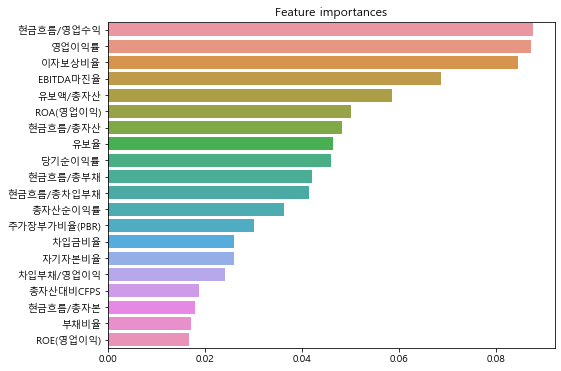

In [62]:
ftr_importances_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_importances_top20.values , y = ftr_importances_top20.index)
plt.show()

In [63]:
print(classification_report(y_test,pred,\
         target_names=['yes','no']))
print(confusion_matrix(y_test,pred))

# 랜덤포레스트는 나쁘지 않다.

              precision    recall  f1-score   support

         yes       0.99      0.97      0.98      3126
          no       0.97      0.99      0.98      3090

    accuracy                           0.98      6216
   macro avg       0.98      0.98      0.98      6216
weighted avg       0.98      0.98      0.98      6216

[[3032   94]
 [  19 3071]]


### 6.1.3. 로지스틱회귀분석 예측

* 정규화

In [64]:
scaler=StandardScaler()
X_scale=scaler.fit_transform(X)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y,test_size=0.3)

* Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)

LogisticRegression()

In [67]:
lr_clf.score(X_test,y_test)

# 성능이 유의적으로 오르긴 하였으나 거의 쓸모가 없음.

0.8647039897039897

* Metrics

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [69]:
pred = lr_clf.predict(X_test)

In [70]:
accuracy_score(y_test,pred)

0.8647039897039897

In [71]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3024
           1       0.87      0.87      0.87      3192

    accuracy                           0.86      6216
   macro avg       0.86      0.86      0.86      6216
weighted avg       0.86      0.86      0.86      6216

[[2607  417]
 [ 424 2768]]


### 6.1.4 서포트벡터머신 예측

* 서포트벡터머신 : 패턴 인식, 자료 분석을 위한 지도 학습 모델이며, 주로 분류와 회귀 분석을 위해 사용

In [72]:
from sklearn.svm import SVC

In [73]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [74]:
model.score(X_test,y_test)

# 이상치 제거 전후가 왜 이렇게 유의적으로 차이가 나는거지?

# 서포트벡터머신의 결과가 좋다면 군집분석도 된다는 것 아니냐?

0.8869047619047619

In [75]:
svc_predict=model.predict(X_test)

In [76]:
print(classification_report(y_test, svc_predict))
print(confusion_matrix(y_test,svc_predict))

# 개수 보면 오류는 아니다.

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      3024
           1       0.88      0.90      0.89      3192

    accuracy                           0.89      6216
   macro avg       0.89      0.89      0.89      6216
weighted avg       0.89      0.89      0.89      6216

[[2625  399]
 [ 304 2888]]


### 6.1.5. 인공신경망으로 예측

* Minmax scaling

In [77]:
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state= 156)

In [79]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16576, 34), (4144, 34), (16576,), (4144,))

* 모형생성 및 학습

In [80]:
model=models.Sequential()
model.add(layers.Dense(4, activation='relu',input_dim=X_train.shape[1]))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 140       
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________
None


In [81]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# 혹시 학습 정의의 문제인가? 그럼 어떻게 바꿔야 하는데

In [82]:
history=model.fit(X_train,y_train,
                 epochs=200,batch_size=128,
                 validation_split=0.3, class_weight={0:1,1:1}) # class_weight={0:0.0506,1:1} 

# smote 했으므로 가중치 1:1 로 학습.

Epoch 1/200
91/91 [==============================] - 3s 10ms/step - loss: 0.7080 - accuracy: 0.5081 - val_loss: 0.6894 - val_accuracy: 0.5916
Epoch 2/200
91/91 [==============================] - 0s 5ms/step - loss: 0.6871 - accuracy: 0.6168 - val_loss: 0.6843 - val_accuracy: 0.5795
Epoch 3/200
91/91 [==============================] - 0s 5ms/step - loss: 0.6806 - accuracy: 0.6288 - val_loss: 0.6785 - val_accuracy: 0.5524
Epoch 4/200
91/91 [==============================] - 0s 5ms/step - loss: 0.6732 - accuracy: 0.6164 - val_loss: 0.6692 - val_accuracy: 0.6031
Epoch 5/200
91/91 [==============================] - 0s 4ms/step - loss: 0.6636 - accuracy: 0.6378 - val_loss: 0.6589 - val_accuracy: 0.6624
Epoch 6/200
91/91 [==============================] - 0s 5ms/step - loss: 0.6524 - accuracy: 0.6617 - val_loss: 0.6480 - val_accuracy: 0.6732
Epoch 7/200
91/91 [==============================] - 0s 5ms/step - loss: 0.6414 - accuracy: 0.6811 - val_loss: 0.6359 - val_accuracy: 0.6943
Epoch 8/200


Epoch 59/200
91/91 [==============================] - 0s 4ms/step - loss: 0.4853 - accuracy: 0.8417 - val_loss: 0.5047 - val_accuracy: 0.7844
Epoch 60/200
91/91 [==============================] - 0s 5ms/step - loss: 0.4851 - accuracy: 0.8410 - val_loss: 0.4831 - val_accuracy: 0.8407
Epoch 61/200
91/91 [==============================] - 0s 4ms/step - loss: 0.4845 - accuracy: 0.8410 - val_loss: 0.4998 - val_accuracy: 0.7931
Epoch 62/200
91/91 [==============================] - 0s 4ms/step - loss: 0.4835 - accuracy: 0.8415 - val_loss: 0.4814 - val_accuracy: 0.8393
Epoch 63/200
91/91 [==============================] - 0s 5ms/step - loss: 0.4823 - accuracy: 0.8412 - val_loss: 0.4838 - val_accuracy: 0.8285
Epoch 64/200
91/91 [==============================] - 0s 4ms/step - loss: 0.4826 - accuracy: 0.8423 - val_loss: 0.5057 - val_accuracy: 0.7792
Epoch 65/200
91/91 [==============================] - 0s 4ms/step - loss: 0.4817 - accuracy: 0.8397 - val_loss: 0.4799 - val_accuracy: 0.8421
Epoch 

91/91 [==============================] - 0s 5ms/step - loss: 0.4557 - accuracy: 0.8369 - val_loss: 0.4600 - val_accuracy: 0.8367
Epoch 117/200
91/91 [==============================] - 0s 5ms/step - loss: 0.4560 - accuracy: 0.8370 - val_loss: 0.4511 - val_accuracy: 0.8425
Epoch 118/200
91/91 [==============================] - 0s 5ms/step - loss: 0.4555 - accuracy: 0.8387 - val_loss: 0.4493 - val_accuracy: 0.8395
Epoch 119/200
91/91 [==============================] - 0s 5ms/step - loss: 0.4554 - accuracy: 0.8387 - val_loss: 0.4502 - val_accuracy: 0.8423
Epoch 120/200
91/91 [==============================] - 0s 5ms/step - loss: 0.4551 - accuracy: 0.8375 - val_loss: 0.4488 - val_accuracy: 0.8432
Epoch 121/200
91/91 [==============================] - 0s 5ms/step - loss: 0.4547 - accuracy: 0.8375 - val_loss: 0.4784 - val_accuracy: 0.8088
Epoch 122/200
91/91 [==============================] - 0s 5ms/step - loss: 0.4536 - accuracy: 0.8378 - val_loss: 0.4506 - val_accuracy: 0.8371
Epoch 123/200

91/91 [==============================] - 0s 5ms/step - loss: 0.4441 - accuracy: 0.8356 - val_loss: 0.4468 - val_accuracy: 0.8335
Epoch 174/200
91/91 [==============================] - 0s 4ms/step - loss: 0.4425 - accuracy: 0.8373 - val_loss: 0.4526 - val_accuracy: 0.8291
Epoch 175/200
91/91 [==============================] - 0s 4ms/step - loss: 0.4427 - accuracy: 0.8378 - val_loss: 0.4563 - val_accuracy: 0.8230
Epoch 176/200
91/91 [==============================] - 0s 4ms/step - loss: 0.4425 - accuracy: 0.8350 - val_loss: 0.4336 - val_accuracy: 0.8413
Epoch 177/200
91/91 [==============================] - 0s 4ms/step - loss: 0.4442 - accuracy: 0.8383 - val_loss: 0.4330 - val_accuracy: 0.8436
Epoch 178/200
91/91 [==============================] - 0s 4ms/step - loss: 0.4427 - accuracy: 0.8360 - val_loss: 0.4611 - val_accuracy: 0.8152
Epoch 179/200
91/91 [==============================] - 0s 4ms/step - loss: 0.4437 - accuracy: 0.8383 - val_loss: 0.4342 - val_accuracy: 0.8450
Epoch 180/200

In [83]:
predicted_result=model.predict(X_test)
predicted_result.shape

130/130 [==============================] - 1s 2ms/step


(4144, 1)

In [84]:
predicted_target=pd.Series([1 if predicted_result[i]> 0.5 \
         else 0 for i in range(0,predicted_result.shape[0])])

In [85]:
accuracy = accuracy_score(y_test , predicted_target)
print('인공신경망 정확도: {0:.4f}'.format(accuracy))

인공신경망 정확도: 0.8453


In [86]:
print(classification_report(y_test,predicted_target,\
         target_names=['yes','no']))
print(confusion_matrix(y_test,predicted_target))

# 정확도만 높고 나머지는 병신인데? 이유가 뭐냐
# 해당 피쳐들로는 맞는것을 고르기는 쉬운데 아닌 것을 고르는게 거의 불가능.

# 아니 왜 하나로 쳐 미는데...
# => 점수를 이런 식으로 주면 19:1 의 비율로 존재하므로 한 값으로 밀어도 95점이 나오는 것. 그래서 이렇게...

              precision    recall  f1-score   support

         yes       0.83      0.87      0.85      2098
          no       0.86      0.82      0.84      2046

    accuracy                           0.85      4144
   macro avg       0.85      0.85      0.85      4144
weighted avg       0.85      0.85      0.85      4144

[[1817  281]
 [ 360 1686]]


In [87]:
history_dict=history.history
history_dict.keys()

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

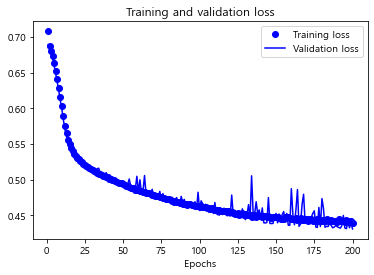

In [88]:
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# 이상치 때문으로 보임

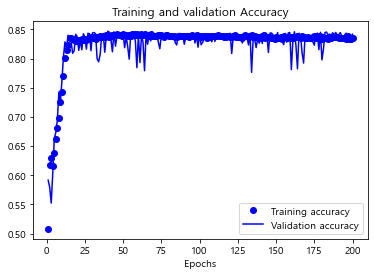

In [89]:
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

## 6.2 전부 없앤 데이터 학습

* SMOTE 를 이용하여 오버샘플링

In [127]:
X=df_removed2.drop(labels=['감사의견'], axis=1)
y=df_removed2['감사의견']

In [128]:
oversample = SMOTE()
X,y=oversample.fit_resample(X,y)

In [129]:
# X.shape, y.shape : ((4090, 33), (4090,))
# df_removed2.shape : (2091, 34)
# X.shape[0]/df_removed2.shape[0] : 1.9560019129603061

<AxesSubplot:xlabel='감사의견', ylabel='count'>

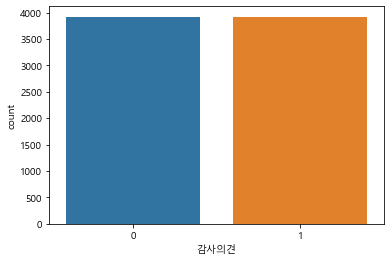

In [130]:
sns.countplot(x=y)

* 학습에 사용할 피쳐 선택

In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel, mutual_info_classif, f_classif, SelectKBest

In [132]:
feature_selection=SelectKBest(f_classif,k=20).fit(X,y)
selected_features=X.columns[feature_selection.get_support()]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

In [134]:
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(5488, 34)
(2352, 34)
(5488,)
(2352,)


### 6.2.1. 앙상블 보팅으로 예측

In [135]:
dt_clf = DecisionTreeClassifier()
knn_clf = KNeighborsClassifier(n_neighbors=8)

vo_clf = VotingClassifier( estimators=[('DT',dt_clf),('KNN',knn_clf)] , voting='soft' )

In [136]:
vo_clf.fit(X_train , y_train)

VotingClassifier(estimators=[('DT', DecisionTreeClassifier()),
                             ('KNN', KNeighborsClassifier(n_neighbors=8))],
                 voting='soft')

In [137]:
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 정확도가 올라갔다... 왜?
# 아 개오바야....

Voting 분류기 정확도: 0.9970


In [138]:
print(classification_report(y_test,pred,\
         target_names=['yes','no']))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

         yes       1.00      1.00      1.00      1165
          no       1.00      1.00      1.00      1187

    accuracy                           1.00      2352
   macro avg       1.00      1.00      1.00      2352
weighted avg       1.00      1.00      1.00      2352

[[1160    5]
 [   2 1185]]


* 개별모델 예측 평가

In [139]:
classifiers = [dt_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))
    
    print(classification_report(y_test,pred,target_names=['yes','no']))
    print(confusion_matrix(y_test,pred),'\n')
    
# 왜 정확도가 같다고 나오지???
# 하나로 찍으니까 그렇게 나오지.

# 참고로, 로지스틱은 정규화 하고 넣어야 한다.

DecisionTreeClassifier 정확도: 0.9953
              precision    recall  f1-score   support

         yes       1.00      0.99      1.00      1165
          no       0.99      1.00      1.00      1187

    accuracy                           1.00      2352
   macro avg       1.00      1.00      1.00      2352
weighted avg       1.00      1.00      1.00      2352

[[1155   10]
 [   1 1186]] 

KNeighborsClassifier 정확도: 0.9486
              precision    recall  f1-score   support

         yes       1.00      0.90      0.95      1165
          no       0.91      1.00      0.95      1187

    accuracy                           0.95      2352
   macro avg       0.95      0.95      0.95      2352
weighted avg       0.95      0.95      0.95      2352

[[1044  121]
 [   0 1187]] 



### 6.2.2. 랜덤포레스트로 예측

In [140]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)

RandomForestClassifier(random_state=0)

In [141]:
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9991


In [142]:
ftr_importances = pd.Series(rf_clf.feature_importances_,index=df_removed1.columns[0:-1])

top_ftr_importances = ftr_importances.sort_values(ascending = False).to_frame()
top_ftr_importances

,0
총자산대비CFPS,0.112927
현금흐름/총자본,0.100749
현금흐름/영업수익,0.069768
현금흐름/총자산,0.061711
ROE(영업이익),0.054307
ROA(영업이익),0.050099
EBITDA마진율,0.049101
현금흐름/총차입부채,0.040639
총자본회전율,0.036303
자기자본비율,0.035382


In [178]:
top_index = top_ftr_importances.index[:6]
top_index

Index(['총자산대비CFPS', '현금흐름/총자본', '현금흐름/영업수익', '현금흐름/총자산', 'ROE(영업이익)',
       'ROA(영업이익)'],
      dtype='object')

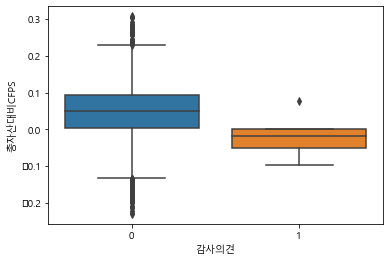

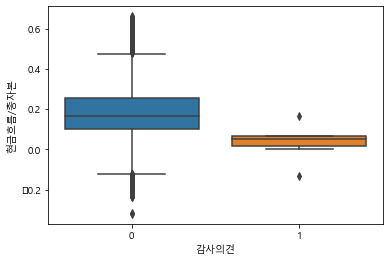

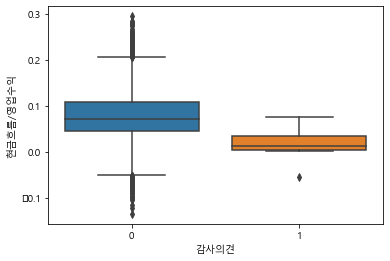

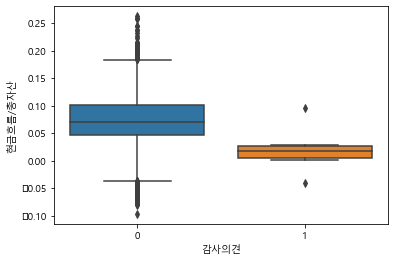

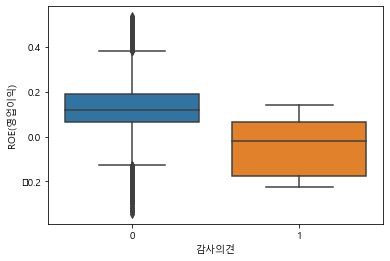

In [144]:
for i in top_index:
    sns.boxplot(x= '감사의견', y= i , data=df_removed2)
    plt.show()

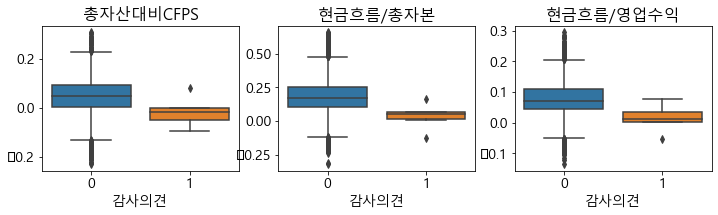

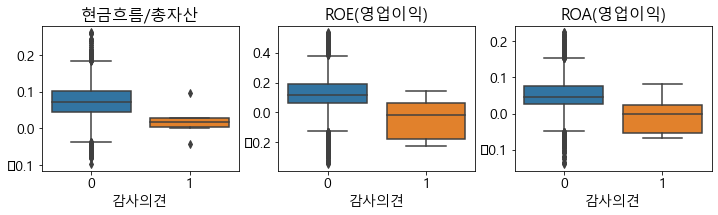

In [179]:
import math

plt.rcParams["font.size"]=14

def draw_boxplot(dataset, columns, horizental_number, vertical_number):
        
    for j in range(vertical_number):
        cols = columns[j*horizental_number:(j+1)*horizental_number]

        n=0
        f, axes = plt.subplots(ncols=horizental_number, figsize=(12,8/horizental_number))

        for i in cols:
            sns.boxplot(x= '감사의견', y= i , data=dataset, ax=axes[n])
            axes[n].set_title(i, fontsize=16)
            axes[n].set_ylabel("")
            
            n=n+1
        plt.show()

horizental_number = 3
draw_boxplot(df_removed2, top_index, horizental_number, math.ceil(len(top_index)/horizental_number))

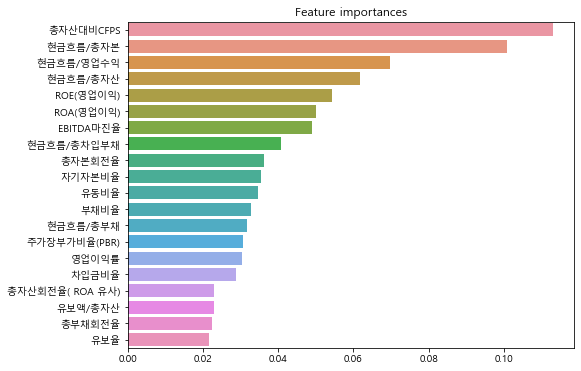

In [145]:
ftr_importances_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_importances_top20.values , y = ftr_importances_top20.index)
plt.show()

In [146]:
print(classification_report(y_test,pred,\
         target_names=['yes','no']))
print(confusion_matrix(y_test,pred))

# 랜덤포레스트는 나쁘지 않다.

              precision    recall  f1-score   support

         yes       1.00      1.00      1.00      1165
          no       1.00      1.00      1.00      1187

    accuracy                           1.00      2352
   macro avg       1.00      1.00      1.00      2352
weighted avg       1.00      1.00      1.00      2352

[[1163    2]
 [   0 1187]]


### 6.1.3. 로지스틱회귀분석 예측

* 정규화

In [147]:
scaler=StandardScaler()
X_scale=scaler.fit_transform(X)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y,test_size=0.3)

* Logistic Regression

In [149]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)

LogisticRegression()

In [150]:
lr_clf.score(X_test,y_test)

# 성능이 유의적으로 오르긴 하였으나 거의 쓸모가 없음.

0.9791666666666666

* Metrics

In [151]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [152]:
pred = lr_clf.predict(X_test)

In [153]:
accuracy_score(y_test,pred)

0.9791666666666666

In [154]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

# 인공신경망과 로지스틱회귀분석은 거의 유사한 방식이다. 
# 이쪽 류는 예측에 그다지 도움이 안되는데 왜?

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1149
           1       0.96      1.00      0.98      1203

    accuracy                           0.98      2352
   macro avg       0.98      0.98      0.98      2352
weighted avg       0.98      0.98      0.98      2352

[[1100   49]
 [   0 1203]]


### 6.1.4 서포트벡터머신 예측

* 서포트벡터머신 : 패턴 인식, 자료 분석을 위한 지도 학습 모델이며, 주로 분류와 회귀 분석을 위해 사용

In [155]:
from sklearn.svm import SVC

In [156]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [157]:
model.score(X_test,y_test)

# 이상치 제거 전후가 왜 이렇게 유의적으로 차이가 나는거지?

0.9995748299319728

In [158]:
svc_predict=model.predict(X_test)

In [159]:
print(classification_report(y_test, svc_predict))
print(confusion_matrix(y_test,svc_predict))

# 개수 보면 오류는 아니다.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1149
           1       1.00      1.00      1.00      1203

    accuracy                           1.00      2352
   macro avg       1.00      1.00      1.00      2352
weighted avg       1.00      1.00      1.00      2352

[[1148    1]
 [   0 1203]]


### 6.1.5. 인공신경망으로 예측

* Minmax scaling

In [160]:
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state= 156)

In [162]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6272, 34), (1568, 34), (6272,), (1568,))

* 모형생성 및 학습

In [163]:
model=models.Sequential()
model.add(layers.Dense(4, activation='relu',input_dim=X_train.shape[1]))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 140       
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________
None


In [164]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [165]:
history=model.fit(X_train,y_train,
                 epochs=200,batch_size=128,
                 validation_split=0.3, class_weight={0:1,1:1}) # class_weight={0:0.0506,1:1} 

# smote 했으므로 가중치 1:1 로 학습.

Epoch 1/200
35/35 [==============================] - 2s 18ms/step - loss: 0.6944 - accuracy: 0.4920 - val_loss: 0.6925 - val_accuracy: 0.4910
Epoch 2/200
35/35 [==============================] - 0s 6ms/step - loss: 0.6915 - accuracy: 0.5089 - val_loss: 0.6907 - val_accuracy: 0.4931
Epoch 3/200
35/35 [==============================] - 0s 5ms/step - loss: 0.6886 - accuracy: 0.5059 - val_loss: 0.6875 - val_accuracy: 0.4915
Epoch 4/200
35/35 [==============================] - 0s 6ms/step - loss: 0.6840 - accuracy: 0.5050 - val_loss: 0.6818 - val_accuracy: 0.4979
Epoch 5/200
35/35 [==============================] - 0s 6ms/step - loss: 0.6776 - accuracy: 0.5262 - val_loss: 0.6750 - val_accuracy: 0.5452
Epoch 6/200
35/35 [==============================] - 0s 6ms/step - loss: 0.6699 - accuracy: 0.5629 - val_loss: 0.6660 - val_accuracy: 0.5744
Epoch 7/200
35/35 [==============================] - 0s 6ms/step - loss: 0.6599 - accuracy: 0.6005 - val_loss: 0.6555 - val_accuracy: 0.6105
Epoch 8/200


Epoch 59/200
35/35 [==============================] - 0s 5ms/step - loss: 0.1326 - accuracy: 0.9740 - val_loss: 0.1296 - val_accuracy: 0.9772
Epoch 60/200
35/35 [==============================] - 0s 6ms/step - loss: 0.1295 - accuracy: 0.9745 - val_loss: 0.1283 - val_accuracy: 0.9798
Epoch 61/200
35/35 [==============================] - 0s 5ms/step - loss: 0.1263 - accuracy: 0.9752 - val_loss: 0.1238 - val_accuracy: 0.9803
Epoch 62/200
35/35 [==============================] - 0s 6ms/step - loss: 0.1233 - accuracy: 0.9745 - val_loss: 0.1199 - val_accuracy: 0.9798
Epoch 63/200
35/35 [==============================] - 0s 6ms/step - loss: 0.1205 - accuracy: 0.9749 - val_loss: 0.1180 - val_accuracy: 0.9787
Epoch 64/200
35/35 [==============================] - 0s 6ms/step - loss: 0.1172 - accuracy: 0.9761 - val_loss: 0.1147 - val_accuracy: 0.9814
Epoch 65/200
35/35 [==============================] - 0s 6ms/step - loss: 0.1150 - accuracy: 0.9763 - val_loss: 0.1123 - val_accuracy: 0.9803
Epoch 

35/35 [==============================] - 0s 5ms/step - loss: 0.0470 - accuracy: 0.9891 - val_loss: 0.0583 - val_accuracy: 0.9862
Epoch 117/200
35/35 [==============================] - 0s 6ms/step - loss: 0.0459 - accuracy: 0.9893 - val_loss: 0.0591 - val_accuracy: 0.9851
Epoch 118/200
35/35 [==============================] - 0s 5ms/step - loss: 0.0460 - accuracy: 0.9895 - val_loss: 0.0933 - val_accuracy: 0.9888
Epoch 119/200
35/35 [==============================] - 0s 5ms/step - loss: 0.0457 - accuracy: 0.9904 - val_loss: 0.0567 - val_accuracy: 0.9867
Epoch 120/200
35/35 [==============================] - 0s 5ms/step - loss: 0.0449 - accuracy: 0.9902 - val_loss: 0.0565 - val_accuracy: 0.9867
Epoch 121/200
35/35 [==============================] - 0s 5ms/step - loss: 0.0436 - accuracy: 0.9907 - val_loss: 0.0568 - val_accuracy: 0.9862
Epoch 122/200
35/35 [==============================] - 0s 6ms/step - loss: 0.0434 - accuracy: 0.9907 - val_loss: 0.0567 - val_accuracy: 0.9872
Epoch 123/200

35/35 [==============================] - 0s 5ms/step - loss: 0.0262 - accuracy: 0.9952 - val_loss: 0.0477 - val_accuracy: 0.9888
Epoch 174/200
35/35 [==============================] - 0s 6ms/step - loss: 0.0263 - accuracy: 0.9945 - val_loss: 0.0485 - val_accuracy: 0.9888
Epoch 175/200
35/35 [==============================] - 0s 5ms/step - loss: 0.0260 - accuracy: 0.9948 - val_loss: 0.0471 - val_accuracy: 0.9888
Epoch 176/200
35/35 [==============================] - 0s 5ms/step - loss: 0.0260 - accuracy: 0.9948 - val_loss: 0.0468 - val_accuracy: 0.9888
Epoch 177/200
35/35 [==============================] - 0s 5ms/step - loss: 0.0257 - accuracy: 0.9948 - val_loss: 0.0493 - val_accuracy: 0.9888
Epoch 178/200
35/35 [==============================] - 0s 5ms/step - loss: 0.0254 - accuracy: 0.9952 - val_loss: 0.0475 - val_accuracy: 0.9888
Epoch 179/200
35/35 [==============================] - 0s 5ms/step - loss: 0.0256 - accuracy: 0.9950 - val_loss: 0.0478 - val_accuracy: 0.9888
Epoch 180/200

In [166]:
predicted_result=model.predict(X_test)
predicted_result.shape

49/49 [==============================] - 0s 3ms/step


(1568, 1)

In [167]:
predicted_target=pd.Series([1 if predicted_result[i]> 0.5 \
         else 0 for i in range(0,predicted_result.shape[0])])

In [168]:
accuracy = accuracy_score(y_test , predicted_target)
print('인공신경망 정확도: {0:.4f}'.format(accuracy))

인공신경망 정확도: 0.9955


In [169]:
print(classification_report(y_test,predicted_target,\
         target_names=['yes','no']))
print(confusion_matrix(y_test,predicted_target))

# 정확도만 높고 나머지는 병신인데? 이유가 뭐냐
# 해당 피쳐들로는 맞는것을 고르기는 쉬운데 아닌 것을 고르는게 거의 불가능.

# 아니 왜 하나로 쳐 미는데...
# => 점수를 이런 식으로 주면 19:1 의 비율로 존재하므로 한 값으로 밀어도 95점이 나오는 것. 그래서 이렇게...

              precision    recall  f1-score   support

         yes       1.00      0.99      1.00       770
          no       0.99      1.00      1.00       798

    accuracy                           1.00      1568
   macro avg       1.00      1.00      1.00      1568
weighted avg       1.00      1.00      1.00      1568

[[763   7]
 [  0 798]]


In [170]:
history_dict=history.history
history_dict.keys()

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

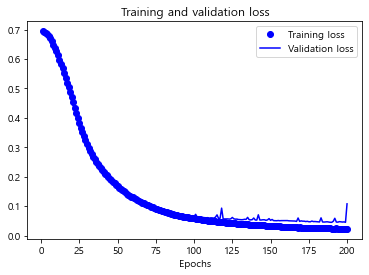

In [171]:
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

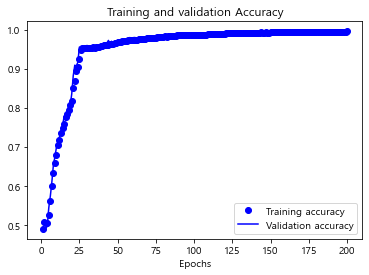

In [172]:
plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()